# data

In [ ]:
# install code for Colab
# For MinMaxScaler
!pip install "dask[complete]"
!python -m pip install dask[dataframe] --upgrade
!pip install dask_ml

In [1]:
# pandas loading
import pandas as pd
df = pd.read_csv('./df_with_type.csv')
df = df[['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
      'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
      'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
      'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
      'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
      'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
      'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
      'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
      'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
      'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
      'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
      'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
      'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
      'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
      'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
      'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
      'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
      'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
      'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
      'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label']]

# Nan, inf, 1970, minus value remove
df = df[~df['Flow Byts/s'].isna()]
df = df[(df['Flow Byts/s']!=float('inf')) & (df['Flow Pkts/s']!=float('inf'))]
df = df[df['Flow Duration']>=0]  # 1970
df = df[df['Flow IAT Min']>=0]  # minus
df = df[df['Bwd Pkt Len Max']>=0]  # minus

# Benign / Not Benign
def func(x) :
    if x == 'Benign': return 0
    else : return 1
df['Type'] = df['Label'].apply(lambda x : func(x))

In [2]:
# TCP, UDP, HOP
tcp_idx = df['Protocol'] == 6
udp_idx = df['Protocol'] == 17
hop_idx = df['Protocol'] == 0

tcp = df.loc[tcp_idx, :]
udp = df.loc[udp_idx, :]
hop = df.loc[hop_idx, :]

len(tcp), len(udp), len(hop)

(6468388, 1685318, 94166)

In [3]:
tcp_normal = tcp[tcp['Type']==0]
tcp_abnormal = tcp[tcp['Type']==1]

udp_normal = udp[udp['Type']==0]
udp_abnormal = udp[udp['Type']==1]

hop_normal = hop[hop['Type']==0]
hop_abnormal = hop[hop['Type']==1]

In [4]:
len(hop_normal), len(hop_abnormal)

(91632, 2534)

In [5]:
# tcp_normal_sample_idx = tcp_normal.copy()
# tcp_abnormal_sample_idx = tcp_abnormal.copy()

# udp_normal_sample_idx = udp_normal.copy()
# udp_abnormal_sample_idx = udp_abnormal.copy()

tcp_normal_sample = tcp_normal.copy()
tcp_abnormal_sample = tcp_abnormal.copy()

udp_normal_sample = udp_normal.copy()
udp_abnormal_sample = udp_abnormal.copy()

hop_normal_sample = hop_normal
hop_abnormal_sample = hop_abnormal

In [6]:
# import random
# tcp_normal_sample_idx = random.sample(list(tcp_normal.index), 91632)
# tcp_abnormal_sample_idx = random.sample(list(tcp_abnormal.index), 2534)

# udp_normal_sample_idx = random.sample(list(udp_normal.index), 91632)
# udp_abnormal_sample_idx = random.sample(list(udp_abnormal.index), 2534)

# tcp_normal_sample = tcp_normal.loc[tcp_normal_sample_idx, :]
# tcp_abnormal_sample = tcp_abnormal.loc[tcp_abnormal_sample_idx, :]

# udp_normal_sample = udp_normal.loc[udp_normal_sample_idx, :]
# udp_abnormal_sample = udp_abnormal.loc[udp_abnormal_sample_idx, :]

# hop_normal_sample = hop_normal
# hop_abnormal_sample = hop_abnormal

In [7]:
tcp_normal_sample.columns

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [8]:
from sklearn.preprocessing import MinMaxScaler

def Scaler(train_df):
  X = train_df.copy()
  X.drop(columns=['Dst Port', 'Label', 'Type', 'Protocol'], inplace=True)
  mm = MinMaxScaler()
  mm.fit(X)
  return mm

def MinMax(df, scaler):
  X = df.drop(columns=['Dst Port', 'Label', 'Type', 'Protocol'])
  y = df['Type']
  X_mm = scaler.transform(X)
  return X_mm, y


# tcp_normal_sample = tcp_normal.loc[tcp_normal_sample_idx, :]
# tcp_abnormal_sample = tcp_abnormal.loc[tcp_abnormal_sample_idx, :]

# udp_normal_sample = udp_normal.loc[udp_normal_sample_idx, :]
# udp_abnormal_sample = udp_abnormal.loc[udp_abnormal_sample_idx, :]

tcp_normal_sample = tcp_normal
tcp_abnormal_sample = tcp_abnormal

udp_normal_sample = udp_normal
udp_abnormal_sample = udp_abnormal

hop_normal_sample = hop_normal
hop_abnormal_sample = hop_abnormal

# Columns transform
tcp_mm = Scaler(tcp_normal_sample)
udp_mm = Scaler(udp_normal_sample)
hop_mm = Scaler(hop_normal_sample)

X_tcp_normal_mm, y_tcp_normal = MinMax(tcp_normal_sample, tcp_mm)
X_udp_normal_mm, y_udp_normal = MinMax(udp_normal_sample, udp_mm)
X_hop_normal_mm, y_hop_normal = MinMax(hop_normal_sample, hop_mm)

X_tcp_abnormal_mm, y_tcp_abnormal = MinMax(tcp_abnormal_sample, tcp_mm)
X_udp_abnormal_mm, y_udp_abnormal = MinMax(udp_abnormal_sample, udp_mm)
X_hop_abnormal_mm, y_hop_abnormal = MinMax(hop_abnormal_sample, hop_mm)

In [9]:
# len(X_tcp_normal_mm_test)

In [10]:
# X_tcp_normal_mm_train = X_tcp_normal_mm[:60000]
# X_udp_normal_mm_train = X_udp_normal_mm[:60000]
# X_hop_normal_mm_train = X_hop_normal_mm[:60000]

# X_tcp_normal_mm_test = X_tcp_normal_mm[60000:]
# X_udp_normal_mm_test = X_udp_normal_mm[60000:]
# X_hop_normal_mm_test = X_hop_normal_mm[60000:]

# y_tcp_normal_train = y_tcp_normal[:60000]
# y_udp_normal_train = y_udp_normal[:60000]
# y_hop_normal_train = y_hop_normal[:60000]

# y_tcp_normal_test = y_tcp_normal[60000:]
# y_udp_normal_test = y_udp_normal[60000:]
# y_hop_normal_test = y_hop_normal[60000:]

In [11]:
#tcp

from dask_ml.model_selection import train_test_split

X_tcp_normal_mm_train, X_tcp_normal_mm_test, y_tcp_normal_train, y_tcp_normal_test = train_test_split(X_tcp_normal_mm, 
                                                                                y_tcp_normal,
                                                                                test_size=0.2, 
                                                                                random_state=0)
X_tcp_abnormal_mm_train, X_tcp_abnormal_mm_test, y_tcp_abnormal_train, y_tcp_abnormal_test = train_test_split(X_tcp_abnormal_mm, 
                                                                                        y_tcp_abnormal, 
                                                                                        test_size=0.2, 
                                                                                        random_state=0)

In [12]:
len(X_tcp_normal_mm_train), len(X_tcp_abnormal_mm_train)

(3482721, 1691988)

In [13]:
#udp

from dask_ml.model_selection import train_test_split

X_udp_normal_mm_train, X_udp_normal_mm_test, y_udp_normal_train, y_udp_normal_test = train_test_split(X_udp_normal_mm, 
                                                                                y_udp_normal,
                                                                                test_size=0.2, 
                                                                                random_state=0)
X_udp_abnormal_mm_train, X_udp_abnormal_mm_test, y_udp_abnormal_train, y_udp_abnormal_test = train_test_split(X_udp_abnormal_mm, 
                                                                                        y_udp_abnormal, 
                                                                                        test_size=0.2, 
                                                                                        random_state=0)

In [14]:
len(X_udp_normal_mm_train), len(X_udp_abnormal_mm_train)

(1305676, 42578)

In [15]:
#hop

from dask_ml.model_selection import train_test_split

X_hop_normal_mm_train, X_hop_normal_mm_test, y_hop_normal_train, y_hop_normal_test = train_test_split(X_hop_normal_mm, 
                                                                                y_hop_normal,
                                                                                test_size=0.2, 
                                                                                random_state=0)
X_hop_abnormal_mm_train, X_hop_abnormal_mm_test, y_hop_abnormal_train, y_hop_abnormal_test = train_test_split(X_hop_abnormal_mm, 
                                                                                        y_hop_abnormal, 
                                                                                        test_size=0.2, 
                                                                                        random_state=0)

In [16]:
len(X_hop_normal_mm_train), len(X_hop_abnormal_mm_train)

(73305, 2027)

In [17]:
from torch.utils.data import Dataset

# reset_index
def get_new_idx(data):
  data = data.reset_index().drop('index',axis=1)
  return data

# customize dataset
class CustomDataset(Dataset):
  def __init__(self, feature, label):
    self.feature = feature
    # idx = self.feature.index
    self.label = label

  def __len__(self):
    return len(self.feature)

  def __getitem__(self, index) : 
    feature = torch.from_numpy(self.feature.loc[index].values).float()
    label = torch.from_numpy(self.label.loc[index].values).float()
    
    return feature, label

In [18]:
tcp_abnormal_sample

Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
94             21         6             19             1             1   
95             21         6              3             1             1   
96             21         6              3             1             1   
97             21         6              2             1             1   
98             21         6              2             1             1   
...           ...       ...            ...           ...           ...   
8211121       445         6         780351             5             3   
8211122      3389         6        2937271            10             7   
8211123       445         6         135614             3             1   
8211124     61209         6             27             2             0   
8211125      3389         6        3674777             9             7   

         TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
94                     0              0.0                0                0   
95                     0              0.0                0                0   
96                     0              0.0                0                0   
97                     0              0.0                0                0   
98                     0              0.0                0                0   
...                  ...              ...              ...              ...   
8211121               53            131.0               53                0   
8211122             1148           1581.0              677                0   
8211123                0              0.0                0                0   
8211124                0              0.0                0                0   
8211125             1148           1581.0              677                0   

         Fwd Pkt Len Mean  ...  Active Mean  Active Std  Active Max  \
94                   0.00  ...          0.0         0.0         0.0   
95                   0.00  ...          0.0         0.0         0.0   
96                   0.00  ...          0.0         0.0         0.0   
97                   0.00  ...          0.0         0.0         0.0   
98                   0.00  ...          0.0         0.0         0.0   
...                   ...  ...          ...         ...         ...   
8211121             10.60  ...          0.0         0.0         0.0   
8211122            114.80  ...          0.0         0.0         0.0   
8211123              0.00  ...          0.0         0.0         0.0   
8211124              0.00  ...          0.0         0.0         0.0   
8211125            127.56  ...          0.0         0.0         0.0   

         Active Min  Idle Mean  Idle Std  Idle Max  Idle Min           Label  \
94              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
95              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
96              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
97              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
98              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
...             ...        ...       ...       ...       ...             ...   
8211121         0.0        0.0       0.0       0.0       0.0   Infilteration   
8211122         0.0        0.0       0.0       0.0       0.0   Infilteration   
8211123         0.0        0.0       0.0       0.0       0.0   Infilteration   
8211124         0.0        0.0       0.0       0.0       0.0   Infilteration   
8211125         0.0        0.0       0.0       0.0       0.0   Infilteration   

         Type  
94          1  
95          1  
96          1  
97          1  
98          1  
...       ...  
8211121     1  
8211122     1  
8211123     1  
8211124     1  
8211125     1  

[2114986 rows x 80 columns]

In [19]:
from dask_ml.model_selection import train_test_split

X_hop_normal_mm_train, X_hop_normal_mm_test, y_hop_normal_train, y_hop_normal_test = train_test_split(X_hop_normal_mm, 
                                                                                y_hop_normal,
                                                                                test_size=0.2, 
                                                                                random_state=0)
X_hop_abnormal_mm_train, X_hop_abnormal_mm_test, y_hop_abnormal_train, y_hop_abnormal_test = train_test_split(X_hop_abnormal_mm, 
                                                                                        y_hop_abnormal, 
                                                                                        test_size=0.2, 
                                                                                        random_state=0)

In [20]:
type(X_tcp_abnormal_mm)

numpy.ndarray

In [21]:
type(X_tcp_normal_mm_test)

numpy.ndarray

In [22]:
temp = pd.DataFrame(X_tcp_abnormal_mm)
temp

0         1         2         3             4         5   \
0        1.500000e-07  0.000000  0.000008  0.000000  0.000000e+00  0.000000   
1        1.666667e-08  0.000000  0.000008  0.000000  0.000000e+00  0.000000   
2        1.666667e-08  0.000000  0.000008  0.000000  0.000000e+00  0.000000   
3        8.333333e-09  0.000000  0.000008  0.000000  0.000000e+00  0.000000   
4        8.333333e-09  0.000000  0.000008  0.000000  0.000000e+00  0.000000   
...               ...       ...       ...       ...           ...       ...   
2114981  6.502917e-03  0.000069  0.000024  0.000006  8.378079e-07  0.000822   
2114982  2.447725e-02  0.000155  0.000057  0.000131  1.011125e-05  0.010506   
2114983  1.130108e-03  0.000034  0.000008  0.000000  0.000000e+00  0.000000   
2114984  2.166667e-07  0.000017  0.000000  0.000000  0.000000e+00  0.000000   
2114985  3.062313e-02  0.000138  0.000057  0.000131  1.011125e-05  0.010506   

          6         7         8         9   ...        66        67   68   69  \
0        0.0  0.000000  0.000000  0.000000  ...  0.000000  0.555556  0.0  0.0   
1        0.0  0.000000  0.000000  0.000000  ...  0.000000  0.555556  0.0  0.0   
2        0.0  0.000000  0.000000  0.000000  ...  0.000000  0.555556  0.0  0.0   
3        0.0  0.000000  0.000000  0.000000  ...  0.000000  0.555556  0.0  0.0   
4        0.0  0.000000  0.000000  0.000000  ...  0.000000  0.555556  0.0  0.0   
...      ...       ...       ...       ...  ...       ...       ...  ...  ...   
2114981  0.0  0.000641  0.001288  0.004163  ...  0.000223  0.000000  0.0  0.0   
2114982  0.0  0.006945  0.011418  0.037275  ...  0.001113  0.000000  0.0  0.0   
2114983  0.0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0   
2114984  0.0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.0  0.0   
2114985  0.0  0.007717  0.011891  0.037275  ...  0.001113  0.000000  0.0  0.0   

          70   71   72   73   74   75  
0        0.0  0.0  0.0  0.0  0.0  0.0  
1        0.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  
...      ...  ...  ...  ...  ...  ...  
2114981  0.0  0.0  0.0  0.0  0.0  0.0  
2114982  0.0  0.0  0.0  0.0  0.0  0.0  
2114983  0.0  0.0  0.0  0.0  0.0  0.0  
2114984  0.0  0.0  0.0  0.0  0.0  0.0  
2114985  0.0  0.0  0.0  0.0  0.0  0.0  

[2114986 rows x 76 columns]

In [23]:
from torch.utils.data import DataLoader

# X_tcp_abnormal_mm, y_tcp_abnormal = MinMax(tcp_abnormal_sample, tcp_mm)
# X_udp_abnormal_mm, y_udp_abnormal = MinMax(udp_abnormal_sample, udp_mm)
# X_hop_abnormal_mm, y_hop_abnormal = MinMax(hop_abnormal_sample, hop_mm)

tcp_test_raw = pd.concat([pd.DataFrame(X_tcp_abnormal_mm), pd.DataFrame(X_tcp_normal_mm_test)])
udp_test_raw = pd.concat([pd.DataFrame(X_udp_abnormal_mm), pd.DataFrame(X_udp_normal_mm_test)])
hop_test_raw = pd.concat([pd.DataFrame(X_hop_abnormal_mm), pd.DataFrame(X_hop_normal_mm_test)])

tcp_label_raw = pd.concat([pd.DataFrame(y_tcp_abnormal), pd.DataFrame(y_tcp_normal_test)])
udp_label_raw = pd.concat([pd.DataFrame(y_udp_abnormal), pd.DataFrame(y_udp_normal_test)])
hop_label_raw = pd.concat([pd.DataFrame(y_hop_abnormal), pd.DataFrame(y_hop_normal_test)])

tcp_train = get_new_idx(pd.DataFrame(X_tcp_normal_mm_train))
udp_train = get_new_idx(pd.DataFrame(X_udp_normal_mm_train))
hop_train = get_new_idx(pd.DataFrame(X_hop_normal_mm_train))

tcp_test = get_new_idx(tcp_test_raw)
udp_test = get_new_idx(udp_test_raw)
hop_test = get_new_idx(hop_test_raw)

tcp_label_train = get_new_idx(y_tcp_normal_train)
udp_label_train = get_new_idx(y_udp_normal_train)
hop_label_train = get_new_idx(y_hop_normal_train)

tcp_label_test = get_new_idx(tcp_label_raw)
udp_label_test = get_new_idx(udp_label_raw)
hop_label_test = get_new_idx(hop_label_raw)

# to_tensor and dataloader
BATCH_SIZE = 512
tcp_train_loader = DataLoader(CustomDataset(tcp_train, tcp_label_train), BATCH_SIZE, shuffle=True)
udp_train_loader = DataLoader(CustomDataset(udp_train, udp_label_train), BATCH_SIZE, shuffle=True)
hop_train_loader = DataLoader(CustomDataset(hop_train, hop_label_train), BATCH_SIZE, shuffle=True)

test_loader1 = DataLoader(CustomDataset(tcp_test, tcp_label_test), BATCH_SIZE, shuffle=True)
test_loader2 = DataLoader(CustomDataset(udp_test, udp_label_test), BATCH_SIZE, shuffle=True)
test_loader3 = DataLoader(CustomDataset(hop_test, hop_label_test), BATCH_SIZE, shuffle=True)

In [24]:
import torch
for data in tcp_train_loader:
  BATCH_SIZE, FEATURE_NUM = data[0].shape
  break

print(BATCH_SIZE, FEATURE_NUM)

512 76


# AE

In [25]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AutoEncoder
class AutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(AutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, code_size),
        nn.BatchNorm1d(2),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

# SAE

In [26]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# Simple AE + stack + dropout
class StackedAutoEncoder(nn.Module):
  def __init__(self,input_dim,output_dim,code_size=2):
    super(StackedAutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(64, 16),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, code_size)
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, 8),
        nn.ReLU(),
        nn.Linear(8, 16),
        nn.ReLU(),
        nn.Linear(16, 64),
        nn.ReLU(),
        nn.Linear(64, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [27]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
model

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=2, bias=True)
    (1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=76, bias=True)
    (1): Sigmoid()
  )
)

## tcp

In [29]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_tcp = AutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_tcp.parameters(),lr=learning_rate)
model_tcp

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=2, bias=True)
    (1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=76, bias=True)
    (1): Sigmoid()
  )
)

In [30]:
from tqdm import tqdm
train_losses = []

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_tcp.train()
  for datas in tcp_train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded,decoded = model_tcp.forward(data)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/len(tcp_train_loader))
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{running_loss/len(tcp_train_loader):.4f}')

 10%|████████                                                                        | 1/10 [09:42<1:27:19, 582.12s/it]

epoch [1/10], train loss:0.0324


 20%|████████████████                                                                | 2/10 [19:22<1:17:32, 581.62s/it]

epoch [2/10], train loss:0.0051


 30%|████████████████████████                                                        | 3/10 [29:04<1:07:52, 581.74s/it]

epoch [3/10], train loss:0.0031


 40%|████████████████████████████████▊                                                 | 4/10 [38:45<58:08, 581.43s/it]

epoch [4/10], train loss:0.0029


 50%|█████████████████████████████████████████                                         | 5/10 [48:21<48:19, 579.93s/it]

epoch [5/10], train loss:0.0028


 60%|█████████████████████████████████████████████████▏                                | 6/10 [58:04<38:43, 580.87s/it]

epoch [6/10], train loss:0.0028


 70%|████████████████████████████████████████████████████████                        | 7/10 [1:07:52<29:08, 582.80s/it]

epoch [7/10], train loss:0.0028


 80%|████████████████████████████████████████████████████████████████                | 8/10 [1:17:33<19:24, 582.29s/it]

epoch [8/10], train loss:0.0028


 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [1:27:28<09:46, 586.29s/it]

epoch [9/10], train loss:0.0028


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:37:06<00:00, 582.67s/it]

epoch [10/10], train loss:0.0028


In [31]:
torch.save(model_tcp, './SimpleAE_code2_B64_E10_model_tcp_60000.pt')

In [32]:
model_tcp = torch.load('./SimpleAE_code2_B64_E10_model_tcp_60000.pt')

In [33]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model_tcp.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(tcp_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_tcp.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████████████████████████████████████████████████████████████████████████| 6803/6803 [13:43<00:00,  8.26it/s]


3482721

In [34]:
import numpy as np
threshold = np.percentile(train_loss_collection, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
threshold

array([1.89195543e-06, 8.13195365e-05, 8.77161801e-05, 2.86339695e-04,
       3.31631309e-04, 9.02344706e-04, 1.72636542e-03, 3.55549855e-03,
       4.73181531e-03, 5.38525963e-03, 1.78224668e-01])

In [35]:
# code_size = 2
# model_tcp
# threshold
from tqdm import tqdm
model_tcp.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss1 = []
zero1 = []
one1 = []

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(test_loader1): 
      datas, labels = datases
      running_val_loss = 0 
      real_abnormal = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_tcp.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal.append(loss)
          predicted_abnormal.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  acc = (tp+tn)/(tp+fn+fp+tn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = 2*(precision*recall)/(precision+recall)
  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████████████████████████████████████████████████████████████████████████| 5832/5832 [12:39<00:00,  7.68it/s]


ZeroDivisionError: division by zero

In [36]:
test_result

tp      fp      tn       fn       acc        f1 precision  \
0.000002  2114986  870681       0        0   0.70838    0.8293   0.70838   
0.000081  1973271  783939   86742   141715  0.689967  0.810013  0.715677   
0.000088  1951671  696976  173705   163315   0.71186  0.819404  0.736856   
0.000286  1944230  610058  260623   170756  0.738479  0.832776  0.761163   
0.000332  1936656  523103  347578   178330  0.765067  0.846673  0.787336   
0.000902  1924252  436331  434350   190734  0.789975  0.859892   0.81516   
0.001726  1387354  348318  522363   727632  0.639628   0.72058  0.799318   
0.003555   688481  261499  609182  1426505  0.434631  0.449258  0.724732   
0.004732   538122  174372  696309  1576864  0.413452  0.380637  0.755265   
0.005385   480500   87132  783549  1634486  0.423372  0.358232  0.846499   
0.178225      NaN     NaN     NaN      NaN       NaN       NaN       NaN   

            recall  
0.000002         1  
0.000081  0.932995  
0.000088  0.922782  
0.000286  0.919264  
0.000332  0.915683  
0.000902  0.909818  
0.001726  0.655964  
0.003555  0.325525  
0.004732  0.254433  
0.005385  0.227188  
0.178225       NaN

In [37]:
test_result.index

Float64Index([1.8919554349849932e-06,  8.131953654810786e-05,
               8.771618013270199e-05,  0.0002863396948669106,
               0.0003316313086543232,  0.0009023447055369616,
                0.001726365415379405,  0.0035554985515773296,
                0.004731815308332443,   0.005385259632021189,
                 0.17822466790676117],
             dtype='float64')

In [48]:
test_result.iloc[:-1]

tp      fp      tn       fn       acc        f1 precision  \
0.000002  2114986  870681       0        0   0.70838    0.8293   0.70838   
0.000081  1973271  783939   86742   141715  0.689967  0.810013  0.715677   
0.000088  1951671  696976  173705   163315   0.71186  0.819404  0.736856   
0.000286  1944230  610058  260623   170756  0.738479  0.832776  0.761163   
0.000332  1936656  523103  347578   178330  0.765067  0.846673  0.787336   
0.000902  1924252  436331  434350   190734  0.789975  0.859892   0.81516   
0.001726  1387354  348318  522363   727632  0.639628   0.72058  0.799318   
0.003555   688481  261499  609182  1426505  0.434631  0.449258  0.724732   
0.004732   538122  174372  696309  1576864  0.413452  0.380637  0.755265   
0.005385   480500   87132  783549  1634486  0.423372  0.358232  0.846499   

            recall  
0.000002         1  
0.000081  0.932995  
0.000088  0.922782  
0.000286  0.919264  
0.000332  0.915683  
0.000902  0.909818  
0.001726  0.655964  
0.003555  0.325525  
0.004732  0.254433  
0.005385  0.227188

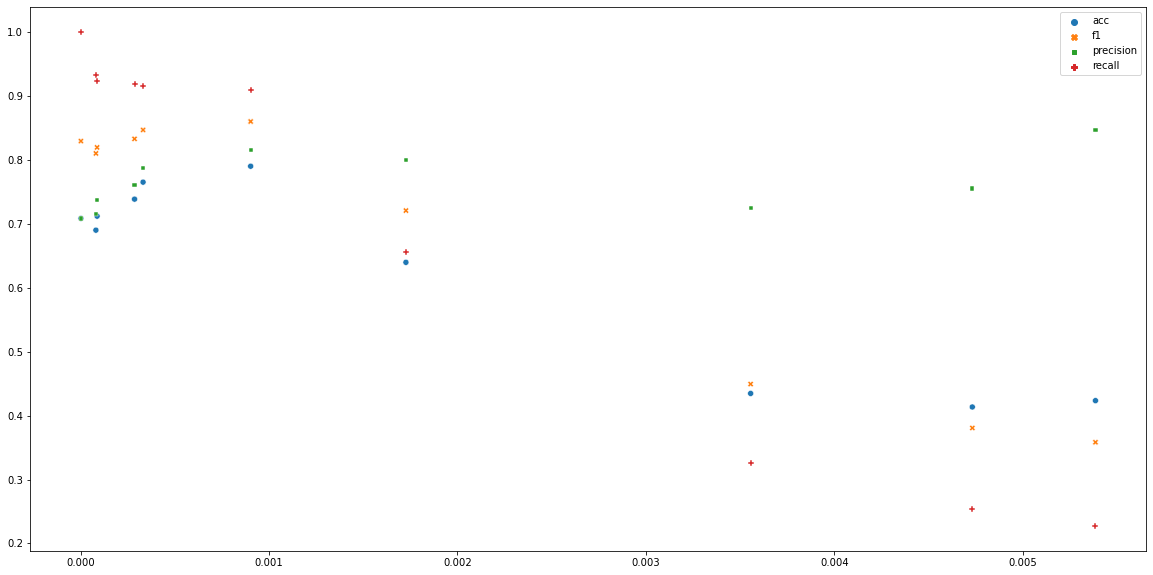

In [53]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
# sns.lineplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result.iloc[:-1][['acc', 'f1', 'precision', 'recall']])
plt.show()

In [57]:
test_result.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11 entries, 1.8919554349849932e-06 to 0.17822466790676117
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tp         10 non-null     object
 1   fp         10 non-null     object
 2   tn         10 non-null     object
 3   fn         10 non-null     object
 4   acc        10 non-null     object
 5   f1         10 non-null     object
 6   precision  10 non-null     object
 7   recall     10 non-null     object
dtypes: object(8)
memory usage: 1.1+ KB


In [58]:
test_result_trim = test_result.iloc[1:-1]
test_result_trim

tp      fp      tn       fn       acc        f1 precision  \
0.000081  1973271  783939   86742   141715  0.689967  0.810013  0.715677   
0.000088  1951671  696976  173705   163315   0.71186  0.819404  0.736856   
0.000286  1944230  610058  260623   170756  0.738479  0.832776  0.761163   
0.000332  1936656  523103  347578   178330  0.765067  0.846673  0.787336   
0.000902  1924252  436331  434350   190734  0.789975  0.859892   0.81516   
0.001726  1387354  348318  522363   727632  0.639628   0.72058  0.799318   
0.003555   688481  261499  609182  1426505  0.434631  0.449258  0.724732   
0.004732   538122  174372  696309  1576864  0.413452  0.380637  0.755265   
0.005385   480500   87132  783549  1634486  0.423372  0.358232  0.846499   

            recall  
0.000081  0.932995  
0.000088  0.922782  
0.000286  0.919264  
0.000332  0.915683  
0.000902  0.909818  
0.001726  0.655964  
0.003555  0.325525  
0.004732  0.254433  
0.005385  0.227188

In [59]:
test_result_trim.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9 entries, 8.131953654810786e-05 to 0.005385259632021189
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tp         9 non-null      object
 1   fp         9 non-null      object
 2   tn         9 non-null      object
 3   fn         9 non-null      object
 4   acc        9 non-null      object
 5   f1         9 non-null      object
 6   precision  9 non-null      object
 7   recall     9 non-null      object
dtypes: object(8)
memory usage: 648.0+ bytes


In [60]:
test_result_trim[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']] = test_result_trim[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']].apply(pd.to_numeric)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [61]:
test_result_trim.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9 entries, 8.131953654810786e-05 to 0.005385259632021189
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tp         9 non-null      int64  
 1   fp         9 non-null      int64  
 2   tn         9 non-null      int64  
 3   fn         9 non-null      int64  
 4   acc        9 non-null      float64
 5   f1         9 non-null      float64
 6   precision  9 non-null      float64
 7   recall     9 non-null      float64
dtypes: float64(4), int64(4)
memory usage: 648.0 bytes


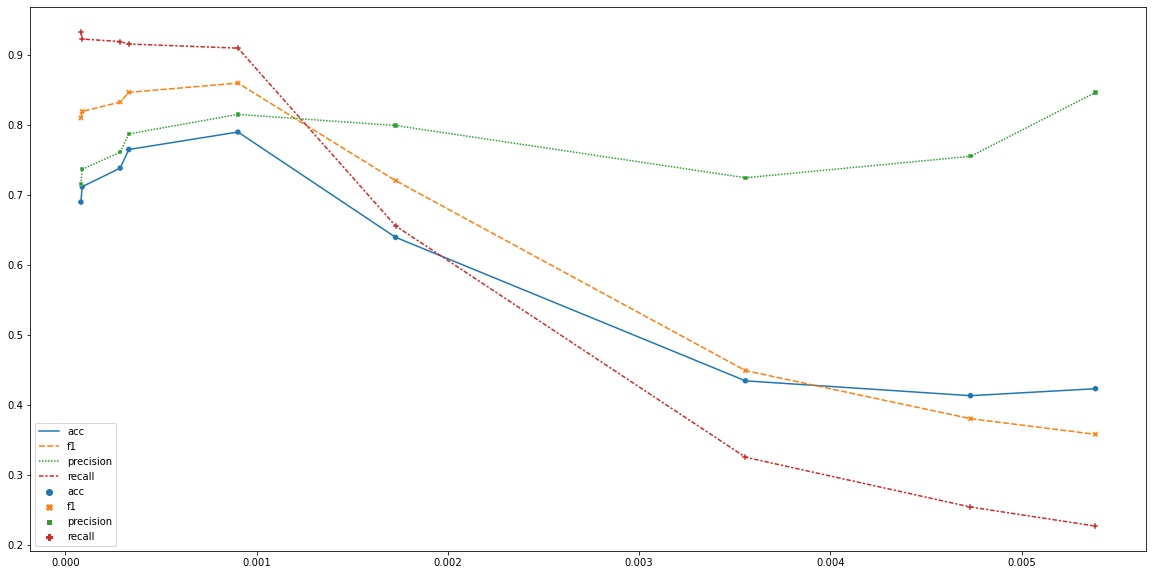

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result_trim[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result_trim[['acc', 'f1', 'precision', 'recall']])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


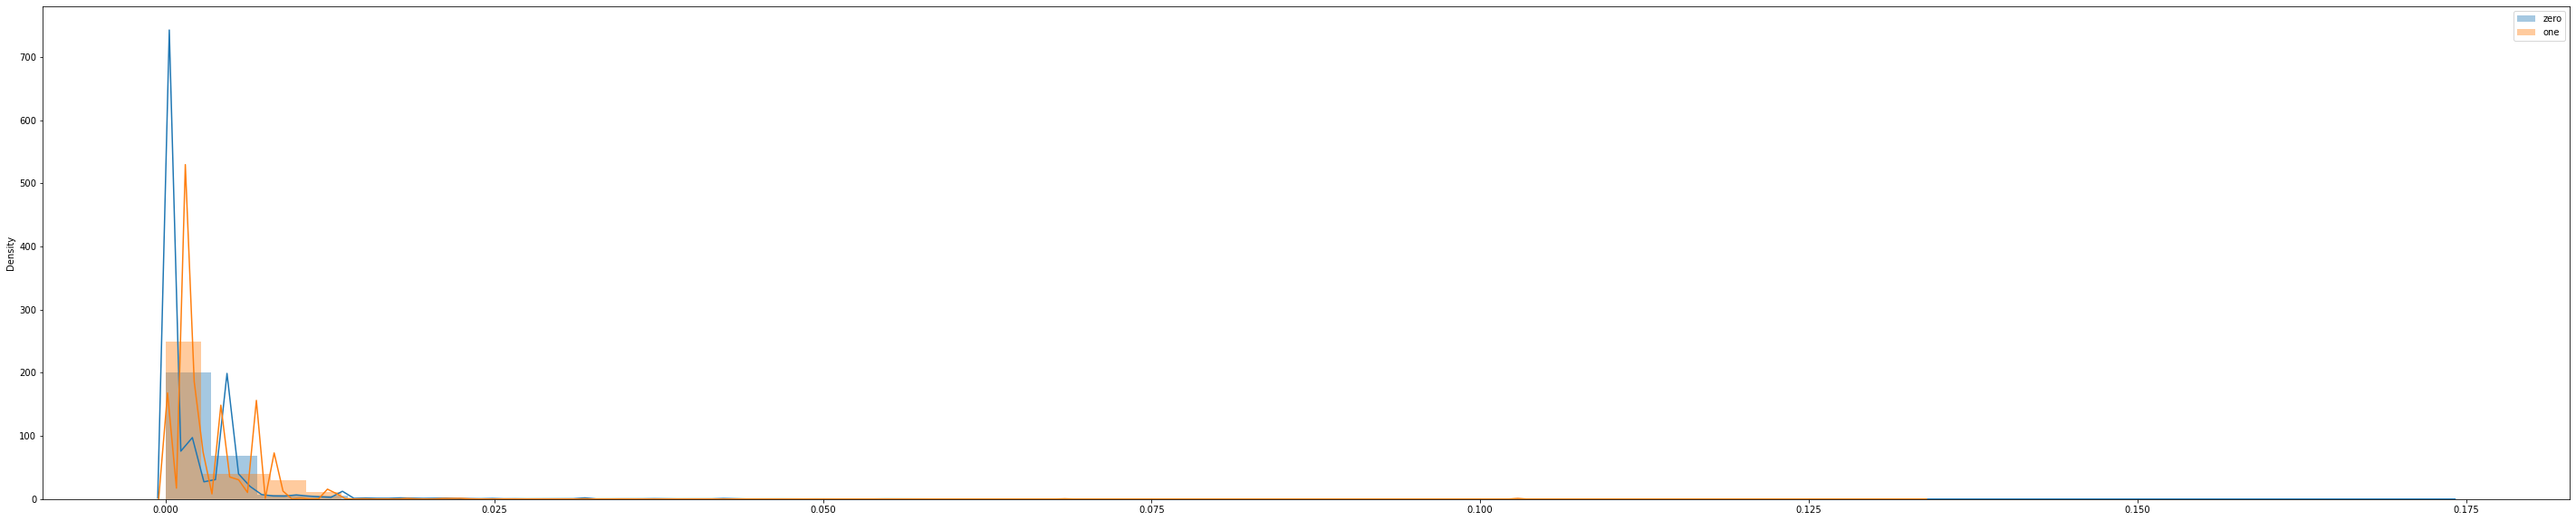

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero1, label='zero')
sns.distplot(one1, label='one')
plt.legend()
plt.show()

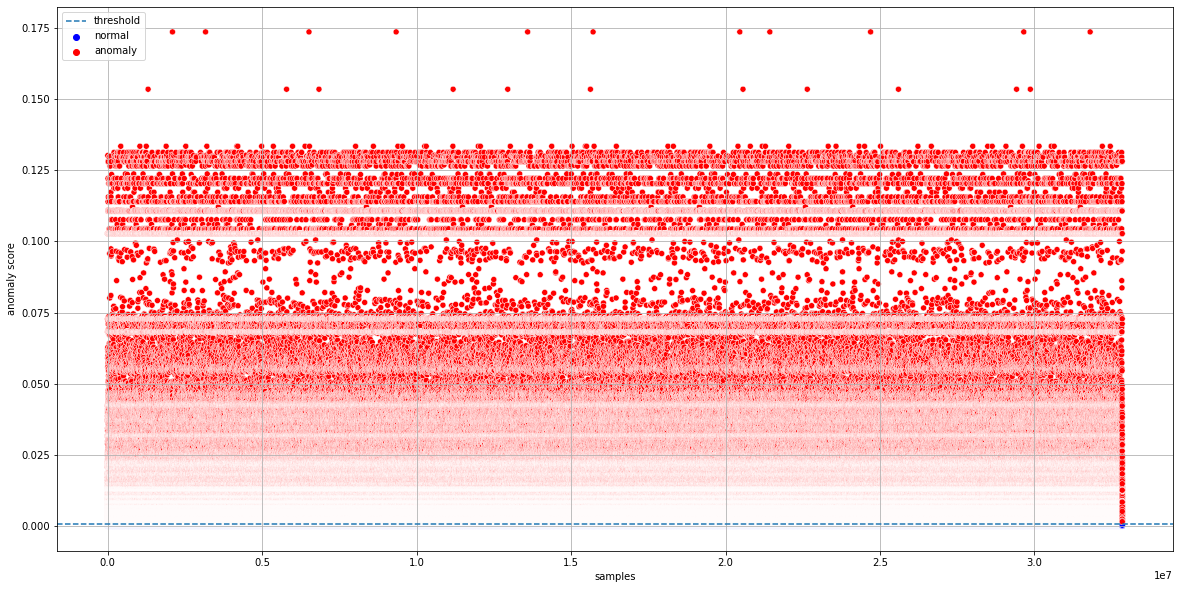

In [64]:
th = 0.000902
def get_loss(x):
  global th 
  if x > th : 
    return 1
  else : 
    return 0
loss_df = pd.Series(total_loss1)
loss_df2 = loss_df.apply(get_loss)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.scatterplot(x=np.arange(0, len(loss_df)), y= loss_df, hue=['normal' if i==0 else 'anomaly' for i in loss_df2],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = th, linestyle='--', label='threshold')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()

zero max, min (0.17355985939502716,) (2.0447128008527216e-06,)
one max, min (0.13340802490711212,) (3.870168256980833e-06,)


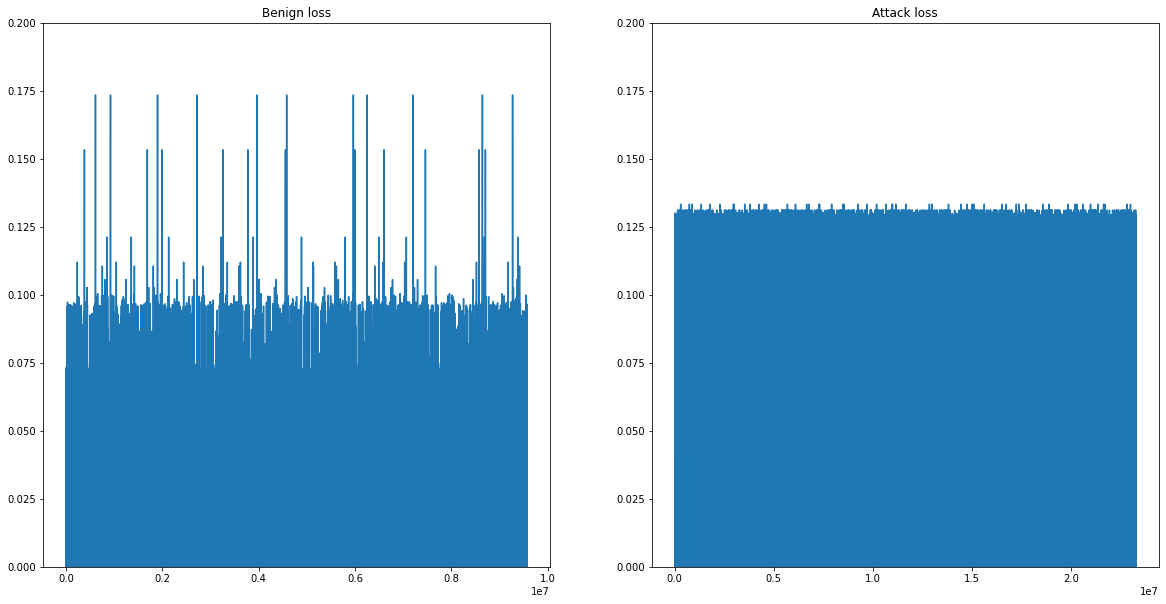

In [66]:
zero_df = pd.DataFrame(zero1)
print('zero max, min', max(zero_df.value_counts().index), min(zero_df.value_counts().index))
one_df = pd.DataFrame(one1)
print('one max, min', max(one_df.value_counts().index), min(one_df.value_counts().index))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_ylim([0, 0.2])
ax[1].set_ylim([0, 0.2])
ax[0].plot(zero_df)
ax[0].set_title('Benign loss')
ax[1].plot(one_df)
ax[1].set_title('Attack loss')
plt.show()

In [67]:
# code_size = 2
# model_hop_ae_cat

# threshold
import numpy as np
threshold = list(set(np.percentile(train_loss_collection, range(44, 57, 3))))

from tqdm import tqdm
model_tcp.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(test_loader1): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_tcp.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try:
    acc = (tp+tn)/(tp+fn+fp+tn)
  except:
    acc = 'NaN'
  try:
    precision = tp/(tp+fp)
  except:
    precision = 'NaN'
  try:
    recall = tp/(tp+fn)
  except:
    recall = 'NaN'
  try:
    f1 = 2*(precision*recall)/(precision+recall)
  except:
    f1 = 'NaN'

  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████████████████████████████████████████████████████████████████████████| 5832/5832 [12:17<00:00,  7.91it/s]


tp      fp      tn      fn       acc        f1 precision  \
0.000473  1934576  462432  408249  180410  0.784691  0.857526  0.807079   
0.000902  1924252  436331  434350  190734  0.789975  0.859892   0.81516   
0.001335  1915361  409902  460779  199625  0.795849  0.862727  0.823718   
0.000359  1936236  488333  382348  178750  0.776572  0.853051   0.79859   
0.001673  1429731  383341  487340  685255  0.642091  0.727958  0.788568   

            recall  
0.000473  0.914699  
0.000902  0.909818  
0.001335  0.905614  
0.000359  0.915484  
0.001673     0.676

In [39]:
threshold = np.percentile(train_loss_collection, range(85, 96))
threshold

array([0.00506727, 0.00508809, 0.00510028, 0.00511359, 0.00519562,
       0.00538526, 0.00571331, 0.00662995, 0.00674572, 0.00760061,
       0.00981368])

In [70]:
test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']] = test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']].apply(pd.to_numeric)

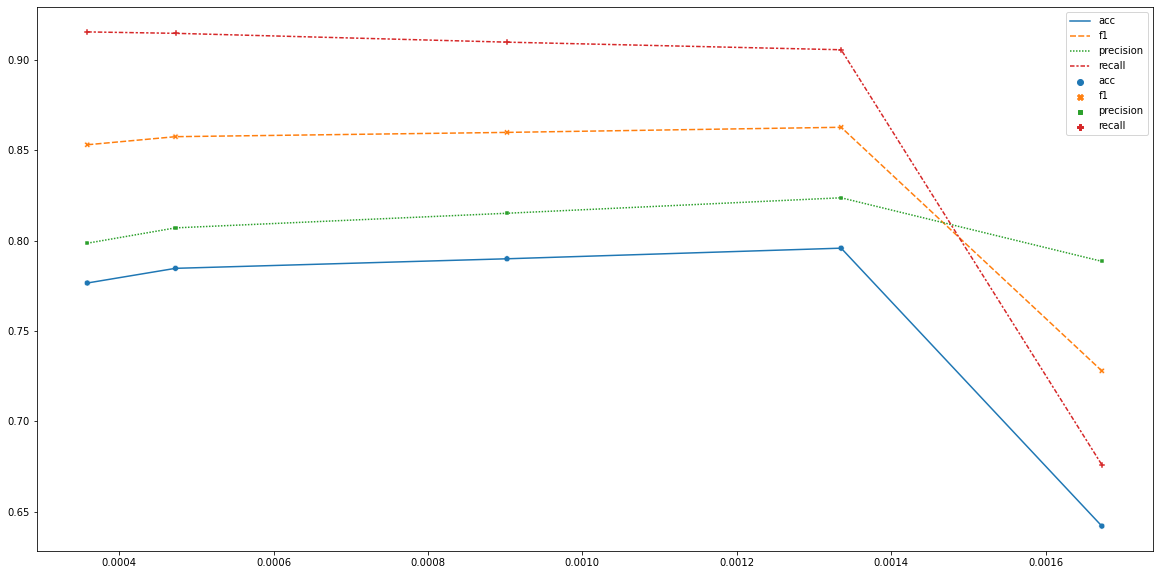

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


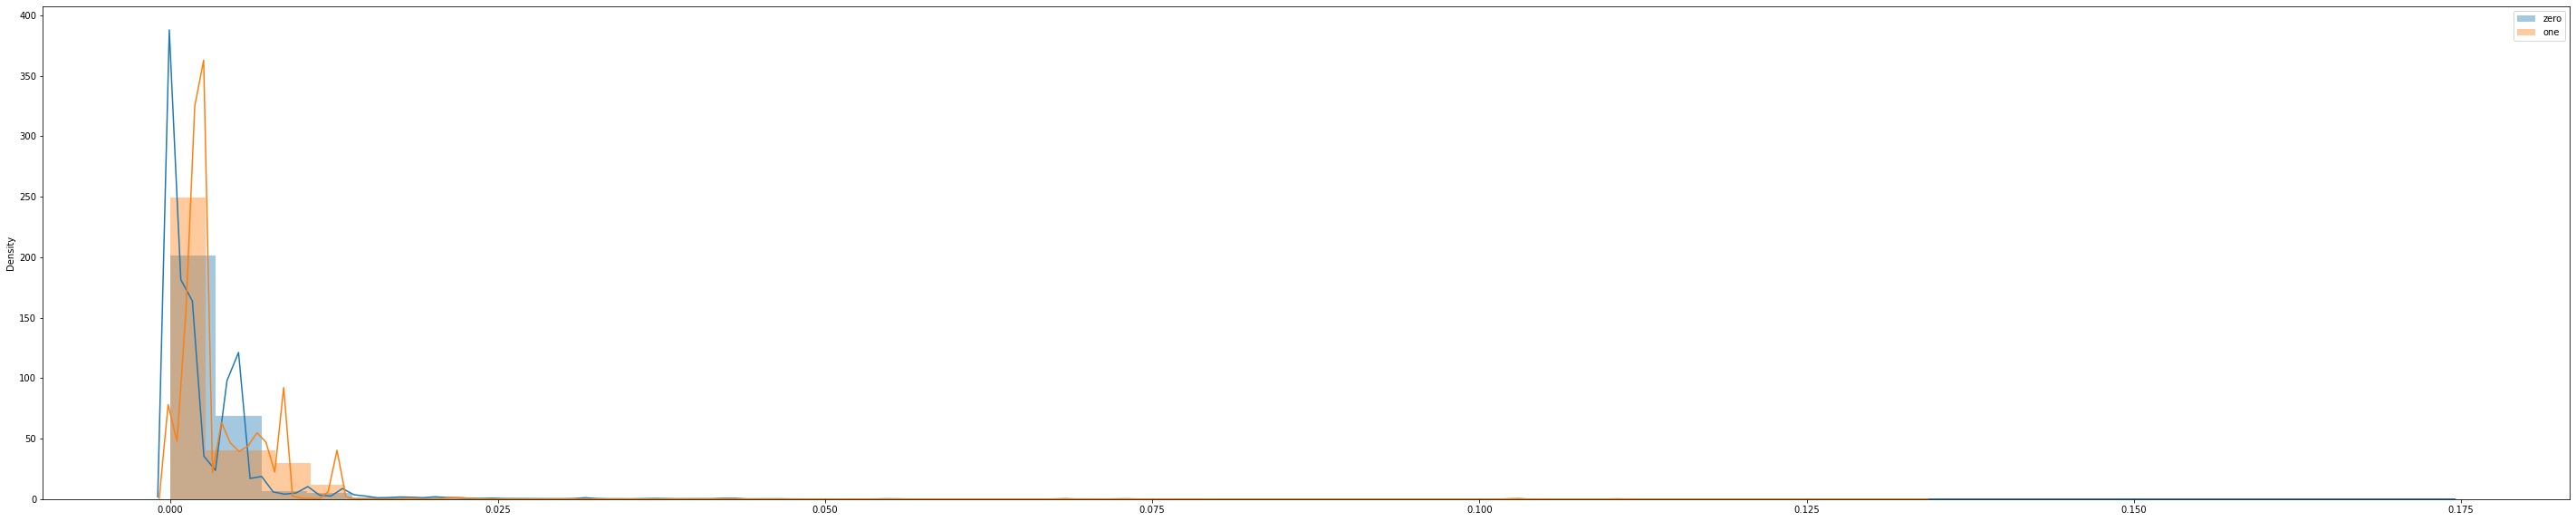

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero1, label='zero')
sns.distplot(one1, label='one')
plt.legend()
plt.show()

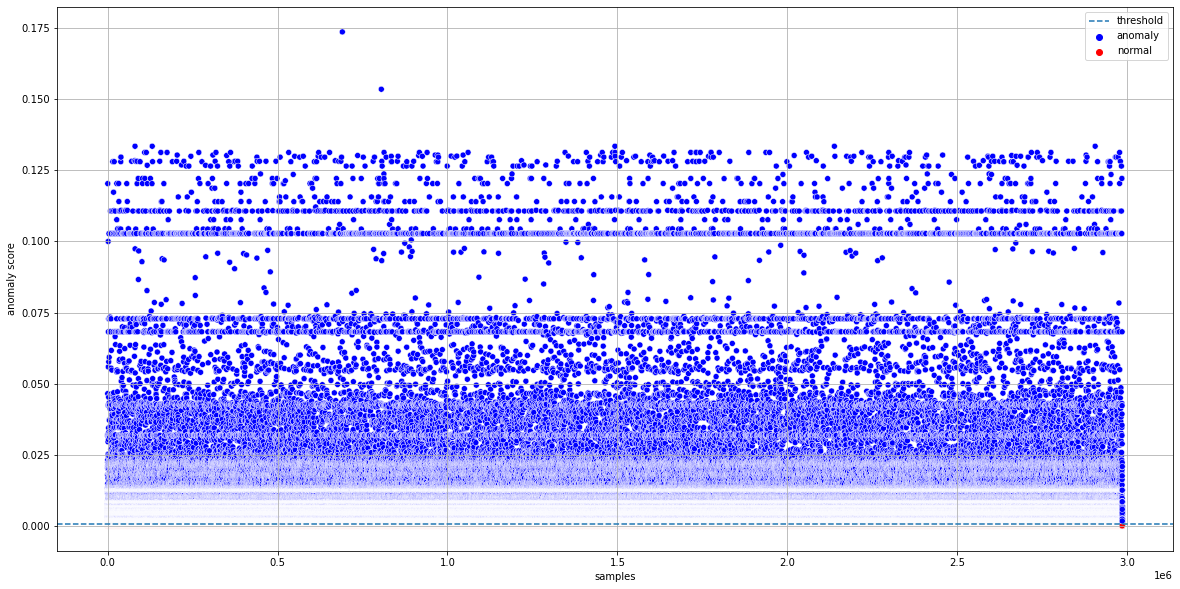

In [73]:
th = 0.000902
def get_loss(x):
  global th 
  if x > th : 
    return 1
  else : 
    return 0
loss_df = pd.Series(total_loss1)
loss_df2 = loss_df.apply(get_loss)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.scatterplot(x=np.arange(0, len(loss_df)), y= loss_df, hue=['normal' if i==0 else 'anomaly' for i in loss_df2],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = th, linestyle='--', label='threshold')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()

zero max, min (0.17355985939502716,) (2.0447128008527216e-06,)
one max, min (0.13340802490711212,) (3.870168256980833e-06,)


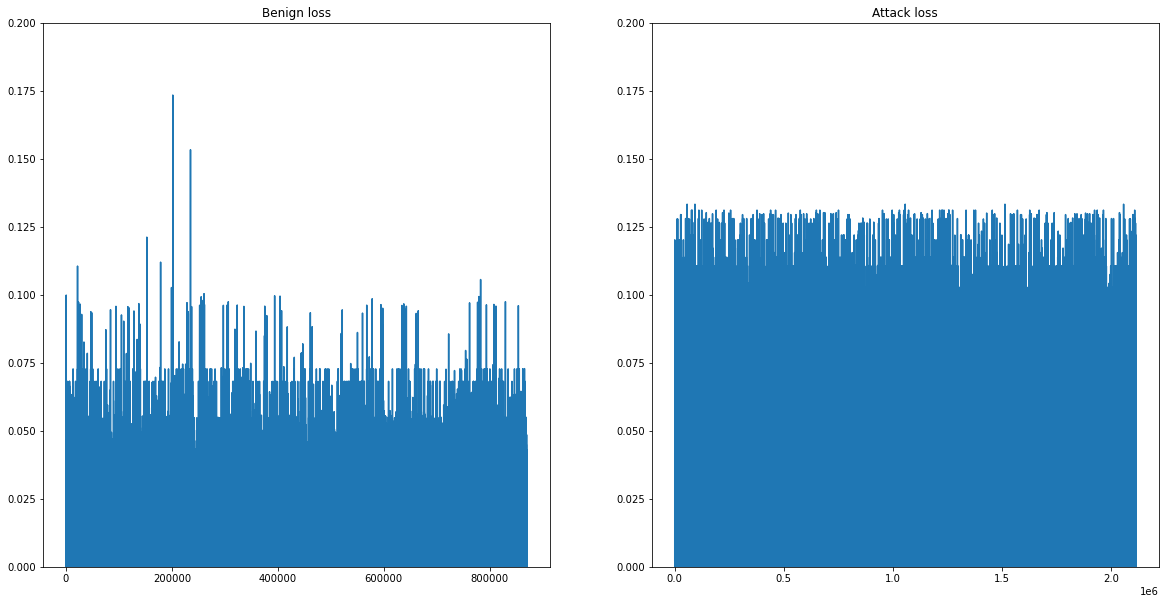

In [74]:
zero_df = pd.DataFrame(zero1)
print('zero max, min', max(zero_df.value_counts().index), min(zero_df.value_counts().index))
one_df = pd.DataFrame(one1)
print('one max, min', max(one_df.value_counts().index), min(one_df.value_counts().index))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_ylim([0, 0.2])
ax[1].set_ylim([0, 0.2])
ax[0].plot(zero_df)
ax[0].set_title('Benign loss')
ax[1].plot(one_df)
ax[1].set_title('Attack loss')
plt.show()

## tcp_stacked

In [28]:
# Stacked AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_tcp_stacked = StackedAutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_tcp_stacked.parameters(),lr=learning_rate)
model_tcp_stacked

StackedAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=76, bias=True)
    (7): Sigmoid()
  )
)

In [31]:
# model_hop_denoisingae training
from tqdm import tqdm
from collections import defaultdict
train_losses = []

minimum = float('inf')
dic = defaultdict(int)

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_tcp_stacked.train()
  for datas in tcp_train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded, decoded = model_tcp_stacked.forward(data)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  val = running_loss/len(tcp_train_loader)
  train_losses.append(val)

  # Early stopping
  if np.round(val,4) <= minimum : 
    minimum = np.round(val,4)
    dic[minimum] += 1
    if dic[minimum] > 3 : 
      break
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{val:.4f}')

 10%|████████████▏                                                                                                             | 1/10 [08:15<1:14:21, 495.68s/it]

epoch [1/10], train loss:0.0040


 20%|████████████████████████▍                                                                                                 | 2/10 [16:36<1:06:29, 498.73s/it]

epoch [2/10], train loss:0.0037


 30%|█████████████████████████████████████▏                                                                                      | 3/10 [24:50<57:55, 496.53s/it]

epoch [3/10], train loss:0.0036


 40%|█████████████████████████████████████████████████▌                                                                          | 4/10 [33:04<49:33, 495.55s/it]

epoch [4/10], train loss:0.0034


 50%|██████████████████████████████████████████████████████████████                                                              | 5/10 [41:22<41:22, 496.46s/it]

epoch [5/10], train loss:0.0032


 60%|██████████████████████████████████████████████████████████████████████████▍                                                 | 6/10 [49:45<33:14, 498.69s/it]

epoch [6/10], train loss:0.0032


 70%|██████████████████████████████████████████████████████████████████████████████████████▊                                     | 7/10 [57:56<24:48, 496.13s/it]

epoch [7/10], train loss:0.0031


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 8/10 [1:06:11<16:31, 495.86s/it]

epoch [8/10], train loss:0.0031


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 9/10 [1:14:32<08:17, 497.53s/it]

epoch [9/10], train loss:0.0031


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [1:22:46<00:00, 496.67s/it]

epoch [10/10], train loss:0.0030


In [32]:
torch.save(model_tcp_stacked, './StackedAE_code2_B512_E10_model_tcp_stacked_6000000_0201.pt')

In [33]:
model_tcp_stacked = torch.load('./StackedAE_code2_B512_E10_model_tcp_stacked_6000000_0201.pt')

In [34]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model_tcp_stacked.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(tcp_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_tcp_stacked.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6803/6803 [16:32<00:00,  6.85it/s]


3482721

In [35]:
# code_size = 2
# model

# threshold
import numpy as np
threshold = list(set(np.percentile(train_loss_collection, range(5, 30, 3))))

from tqdm import tqdm
model_tcp_stacked.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(test_loader1): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_tcp_stacked.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try : 
    acc = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
  except : 
    continue
  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5832/5832 [14:46<00:00,  6.58it/s]


tp      fp      tn      fn       acc        f1 precision  \
0.001780  1670825  827194   43487  444161  0.574181  0.724398   0.66886   
0.003688  1661270  722727  147954  453716   0.60597  0.738509  0.696842   
0.003702  1660683  696592  174089  454303  0.614527  0.742659  0.704493   
0.003720  1657274  670364  200317  457712   0.62217  0.746079  0.711998   
0.006295  1648102  618103  252578  466884  0.636601  0.752353  0.727252   
0.002072  1670642  748823  121858  444344  0.600368  0.736866  0.690501   
0.001885  1670753  800761   69920  444233   0.58301  0.728552  0.676004   
0.001946  1670717  774914   95767  444269  0.591655  0.732671  0.683144   
0.005660  1653937  644198  226483  461049  0.629816  0.749554  0.719687   

            recall  
0.001780  0.789993  
0.003688  0.785476  
0.003702  0.785198  
0.003720  0.783586  
0.006295   0.77925  
0.002072  0.789907  
0.001885  0.789959  
0.001946  0.789942  
0.005660  0.782008

In [36]:
test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']] = test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']].apply(pd.to_numeric)

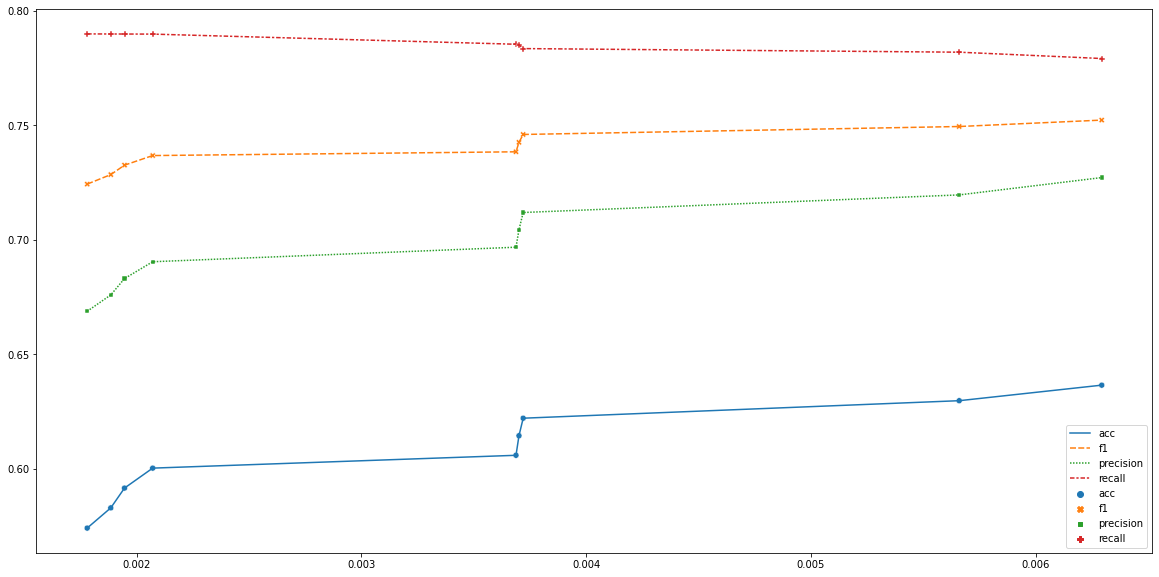

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


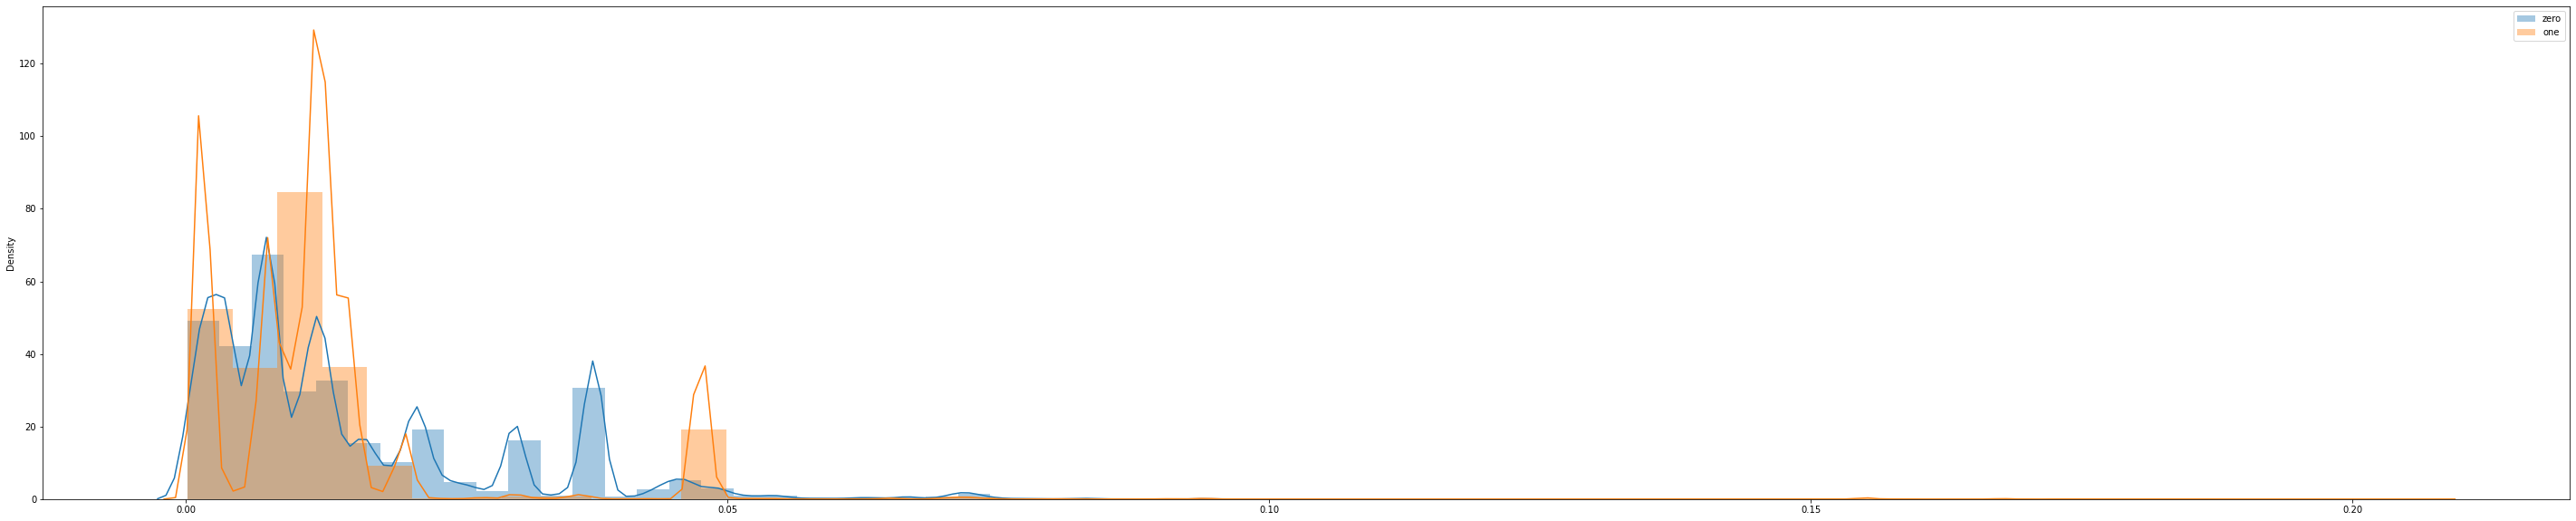

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero1, label='zero')
sns.distplot(one1, label='one')
plt.legend()
plt.show()

zero max, min (0.148336723446846,) (0.00011361096403561532,)
one max, min (0.20727026462554932,) (0.00013735666288994253,)


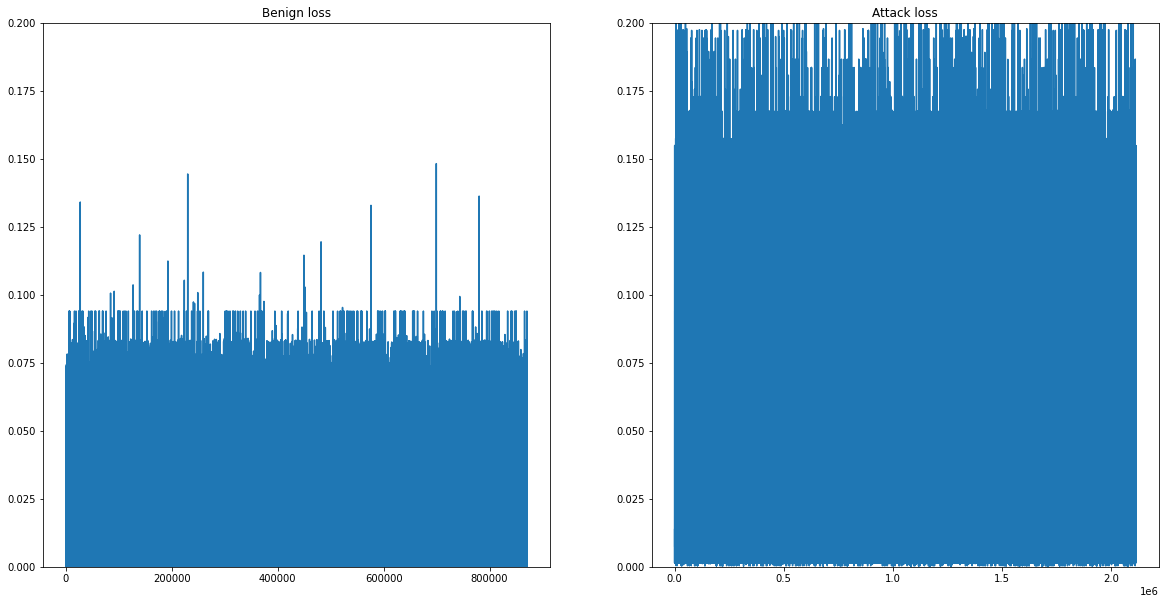

In [42]:
zero_df = pd.DataFrame(zero1)
print('zero max, min', max(zero_df.value_counts().index), min(zero_df.value_counts().index))
one_df = pd.DataFrame(one1)
print('one max, min', max(one_df.value_counts().index), min(one_df.value_counts().index))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_ylim([0, 0.2])
ax[1].set_ylim([0, 0.2])
ax[0].plot(zero_df)
ax[0].set_title('Benign loss')
ax[1].plot(one_df)
ax[1].set_title('Attack loss')
plt.show()

In [107]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model_tcp_stacked.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(tcp_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_tcp_stacked.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████████████████████████████████████████████████████████████████████████| 6803/6803 [18:04<00:00,  6.27it/s]


3482721

In [108]:
import numpy as np
threshold = np.percentile(train_loss_collection, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
threshold

array([2.00473623e-05, 2.12478961e-04, 1.84994540e-03, 3.47323949e-03,
       3.55571206e-03, 5.18289907e-03, 1.05762705e-02, 1.07653989e-02,
       1.77270640e-02, 3.91274281e-02, 1.92844465e-01])

In [109]:
# code_size = 2
# model_tcp
# threshold
from tqdm import tqdm
model_tcp_stacked.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss1 = []
zero1 = []
one1 = []

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(test_loader1): 
      datas, labels = datases
      running_val_loss = 0 
      real_abnormal = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_tcp_stacked.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal.append(loss)
          predicted_abnormal.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  acc = (tp+tn)/(tp+fn+fp+tn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = 2*(precision*recall)/(precision+recall)
  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████████████████████████████████████████████████████████████████████████| 5832/5832 [16:29<00:00,  5.89it/s]


ZeroDivisionError: division by zero

In [111]:
test_result

tp      fp      tn       fn       acc        f1 precision  \
0.000020  2114986  870680       1        0   0.70838    0.8293   0.70838   
0.000212  2107919  783747   86934     7067   0.73513  0.842047  0.728964   
0.001850  2003460  697014  173667   111526  0.729193  0.832095  0.741892   
0.003473  1549753  610032  260649   565233  0.606364  0.725069   0.71755   
0.003556  1526323  523137  347544   588663  0.627621  0.733026  0.744744   
0.005183  1258670  436076  434605   856316  0.567135  0.660766  0.742689   
0.010576   723735  349145  521536  1391251  0.417083  0.454056  0.674572   
0.010765   717674  261685  608996  1397312  0.444346  0.463862    0.7328   
0.017727   258982  174480  696201  1856004  0.319923  0.203247  0.597473   
0.039127   183748   86999  783682  1931238  0.324025  0.154039   0.67867   
0.192844      NaN     NaN     NaN      NaN       NaN       NaN       NaN   

             recall  
0.000020          1  
0.000212   0.996659  
0.001850   0.947269  
0.003473   0.732749  
0.003556    0.72167  
0.005183    0.59512  
0.010576   0.342194  
0.010765   0.339328  
0.017727   0.122451  
0.039127  0.0868791  
0.192844        NaN

In [112]:
test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']] = test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']].apply(pd.to_numeric)

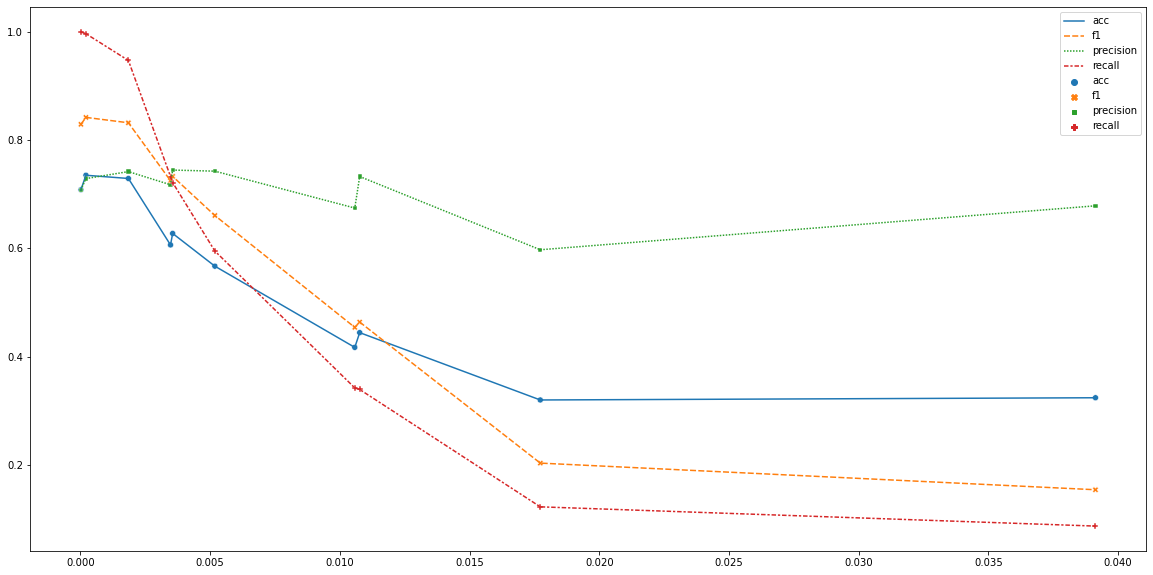

In [113]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


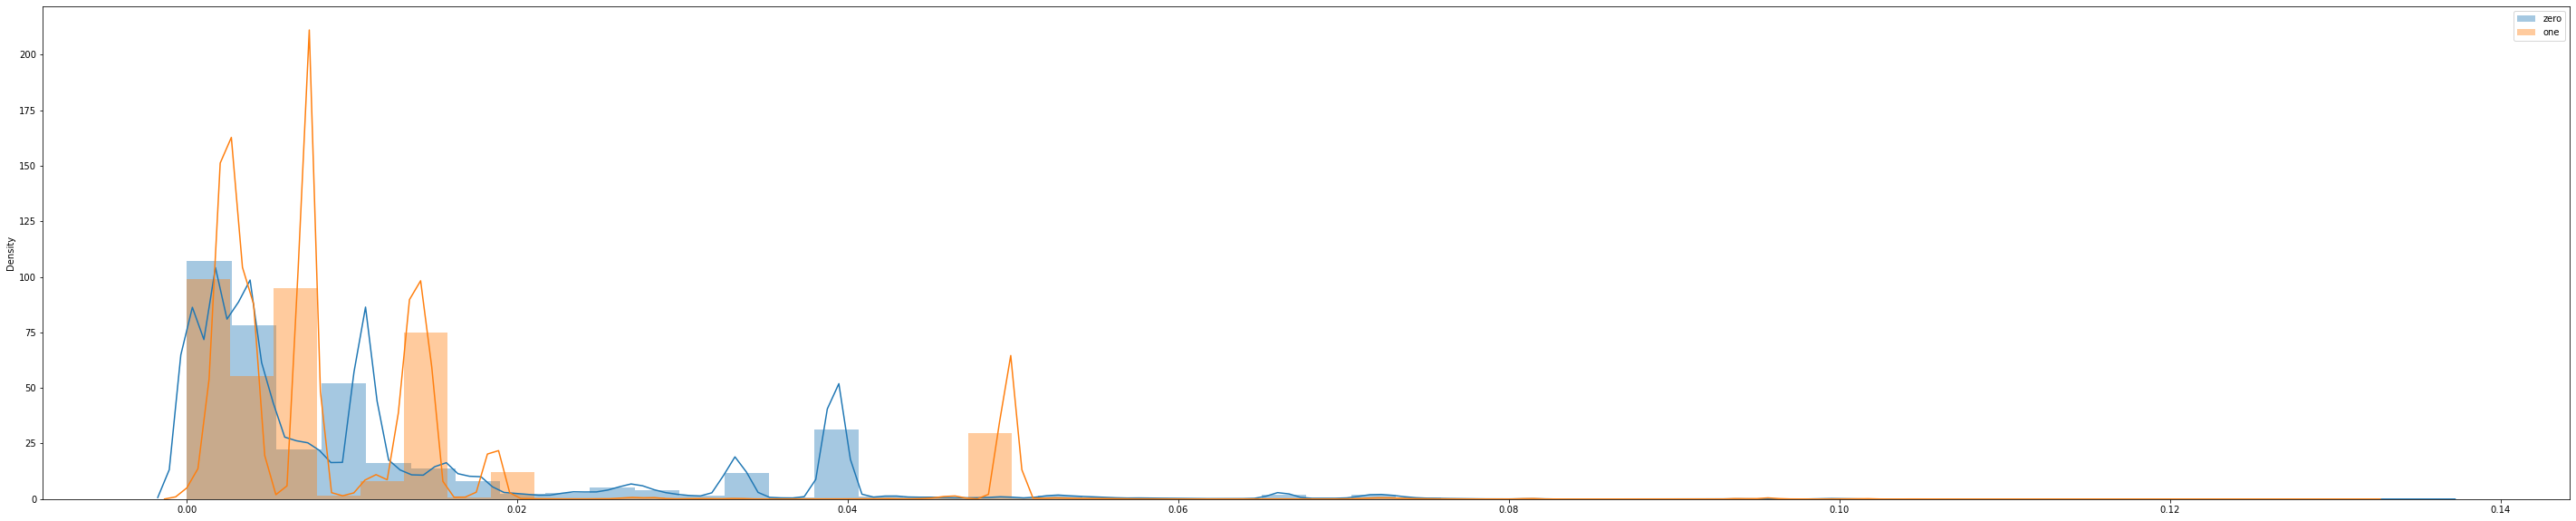

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.distplot(zero1, label='zero')
sns.distplot(one1, label='one')
plt.legend()
plt.show()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


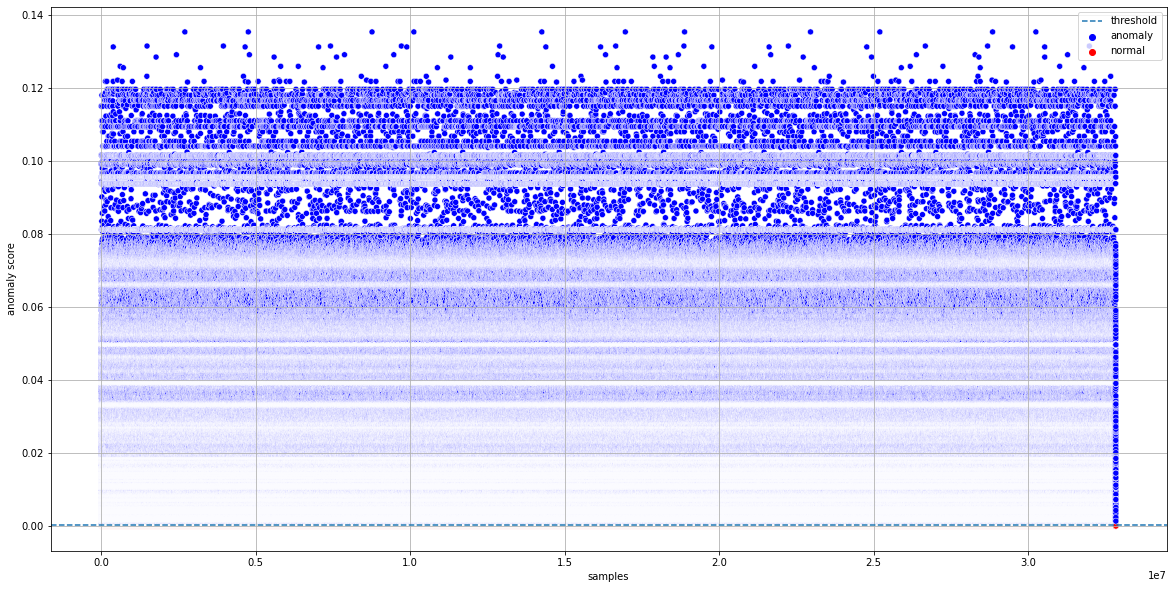

In [115]:
th = 0.000212
def get_loss(x):
  global th 
  if x > th : 
    return 1
  else : 
    return 0
loss_df = pd.Series(total_loss1)
loss_df2 = loss_df.apply(get_loss)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.scatterplot(x=np.arange(0, len(loss_df)), y= loss_df, hue=['normal' if i==0 else 'anomaly' for i in loss_df2],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = th, linestyle='--', label='threshold')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()

zero max, min (0.1354820281267166,) (2.0046647478011437e-05,)
one max, min (0.13136661052703857,) (2.0079072783119045e-05,)


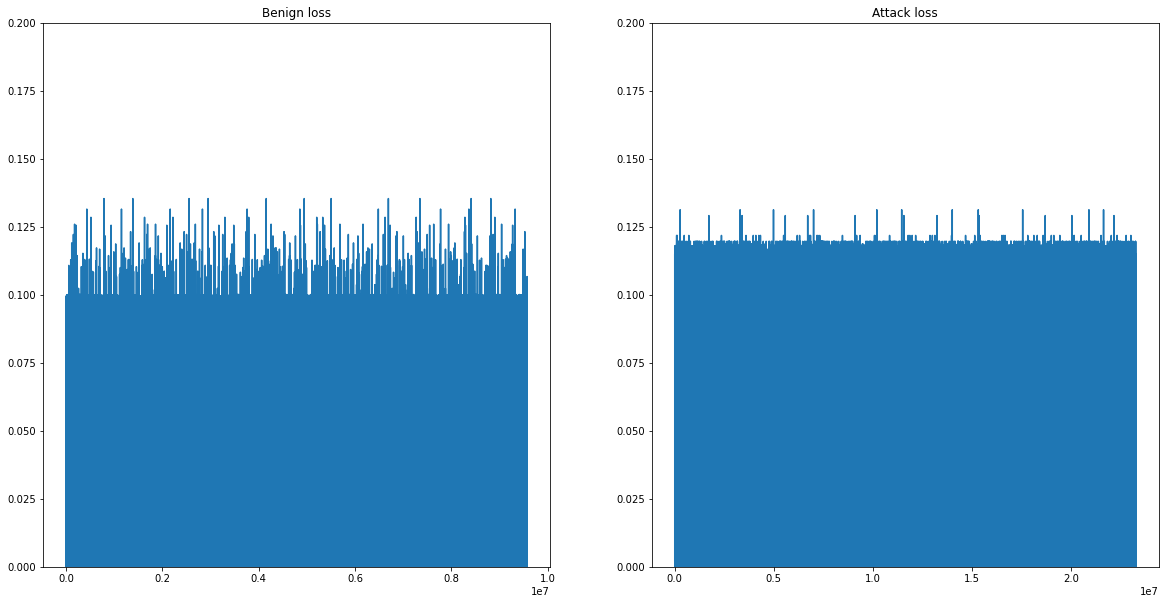

In [116]:
zero_df = pd.DataFrame(zero1)
print('zero max, min', max(zero_df.value_counts().index), min(zero_df.value_counts().index))
one_df = pd.DataFrame(one1)
print('one max, min', max(one_df.value_counts().index), min(one_df.value_counts().index))

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_ylim([0, 0.2])
ax[1].set_ylim([0, 0.2])
ax[0].plot(zero_df)
ax[0].set_title('Benign loss')
ax[1].plot(one_df)
ax[1].set_title('Attack loss')
plt.show()

# Denoising AutoEncoder

In [25]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# Denoising AE : input data noising + StackedAE
class DenoisingAutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(DenoisingAutoEncoder,self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(64, 16),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(16, 8),
        nn.ReLU(),
        nn.Linear(8, code_size)
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, 8),
        nn.ReLU(),
        nn.Linear(8, 16),
        nn.ReLU(),
        nn.Linear(16, 64),
        nn.ReLU(),
        nn.Linear(64, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [26]:
# Denoise AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_DenoisingAutoEncoder = DenoisingAutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model_DenoisingAutoEncoder.parameters(),lr=learning_rate)
model_DenoisingAutoEncoder

DenoisingAutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=76, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=76, bias=True)
    (7): Sigmoid()
  )
)

# 디노이징 다시!!! 디스코드 민호형 코드 참고

In [30]:
# model_hop_denoisingae training
from tqdm import tqdm
from collections import defaultdict
train_losses = []

minimum = float('inf')
dic = defaultdict(int)

# add noise (0.2)
def add_noise(data):
    # torch.randn: Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1
    noise = torch.randn(data.size()) * 0.2
    noisy_data = data + noise
    return noisy_data

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model_DenoisingAutoEncoder.train()
  for datas in tcp_train_loader:
    data, _ = datas
    noisy = add_noise(data)
    noisy = noisy.to(DEVICE)
    data = data.to(DEVICE)
    noisy = noisy.float()
    data = data.float()
    # ===================forward=====================
    encoded, decoded = model_DenoisingAutoEncoder.forward(noisy)
    loss = criterion(decoded, data)
    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  val = running_loss/len(tcp_train_loader)
  train_losses.append(val)

  # Early stopping
  if np.round(val,4) <= minimum : 
    minimum = np.round(val,4)
    dic[minimum] += 1
    if dic[minimum] > 3 : 
      break
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{val:.4f}')

 10%|████████                                                                        | 1/10 [10:13<1:31:59, 613.30s/it]

epoch [1/10], train loss:0.0047


 20%|████████████████                                                                | 2/10 [20:07<1:21:00, 607.54s/it]

epoch [2/10], train loss:0.0046


 30%|████████████████████████                                                        | 3/10 [29:56<1:10:13, 601.88s/it]

epoch [3/10], train loss:0.0045


 40%|████████████████████████████████▊                                                 | 4/10 [39:39<59:37, 596.26s/it]

epoch [4/10], train loss:0.0044


 50%|█████████████████████████████████████████                                         | 5/10 [49:24<49:24, 592.97s/it]

epoch [5/10], train loss:0.0044


 60%|█████████████████████████████████████████████████▏                                | 6/10 [59:09<39:22, 590.70s/it]

epoch [6/10], train loss:0.0043


 70%|████████████████████████████████████████████████████████                        | 7/10 [1:08:52<29:24, 588.29s/it]

epoch [7/10], train loss:0.0043


 80%|████████████████████████████████████████████████████████████████                | 8/10 [1:18:33<19:32, 586.04s/it]

epoch [8/10], train loss:0.0042


 90%|████████████████████████████████████████████████████████████████████████        | 9/10 [1:28:10<09:43, 583.39s/it]

epoch [9/10], train loss:0.0042


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [1:37:49<00:00, 586.97s/it]

epoch [10/10], train loss:0.0042


In [32]:
torch.save(model_DenoisingAutoEncoder, './DenoiseAE_code2_B512_E10_model_tcp_6000000_rerere.pt')

In [33]:
model_tcp_denoise = torch.load('./DenoiseAE_code2_B512_E10_model_tcp_6000000_rerere.pt')

In [34]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model_tcp_denoise.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(tcp_train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model_tcp_denoise.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|██████████████████████████████████████████████████████████████████████████████| 6803/6803 [17:37<00:00,  6.44it/s]


3482721

In [35]:
# code_size = 2
# model

# threshold
import numpy as np
threshold = list(set(np.percentile(train_loss_collection, range(0, 101, 10))))

from tqdm import tqdm
model_tcp_denoise.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(test_loader1): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_tcp_denoise.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try : 
    acc = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
  except : 
    continue
  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████████████████████████████████████████████████████████████████████████| 5832/5832 [15:39<00:00,  6.21it/s]


tp      fp      tn       fn       acc        f1 precision  \
0.000111  2114986  870681       0        0   0.70838    0.8293   0.70838   
0.000674  2108782  783338   87343     6204  0.735556  0.842316  0.729147   
0.001298  1502500  522420  348261   612486  0.619882  0.725862  0.742005   
0.000725  1971993  696530  174151   142993  0.718816  0.824496  0.738983   
0.001057  1947754  609204  261477   167232  0.739946  0.833809  0.761747   
0.001441  1499893  435674  435007   615093  0.648063  0.740587  0.774911   
0.003782   845427  348386  522295  1269559  0.458096  0.511017  0.708174   
0.005691   805604  261225  609456  1309382  0.473951   0.50638  0.755139   
0.008929   374971  174232  696449  1740015  0.358854   0.28149  0.682755   
0.009636   272284   87438  783243  1842702  0.353531  0.220053  0.756929   
0.142970      NaN     NaN     NaN      NaN       NaN       NaN       NaN   

            recall  
0.000111         1  
0.000674  0.997067  
0.001298  0.710407  
0.000725  0.932391  
0.001057   0.92093  
0.001441  0.709174  
0.003782  0.399732  
0.005691  0.380903  
0.008929  0.177292  
0.009636   0.12874  
0.142970       NaN

In [36]:
test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']] = test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']].apply(pd.to_numeric)

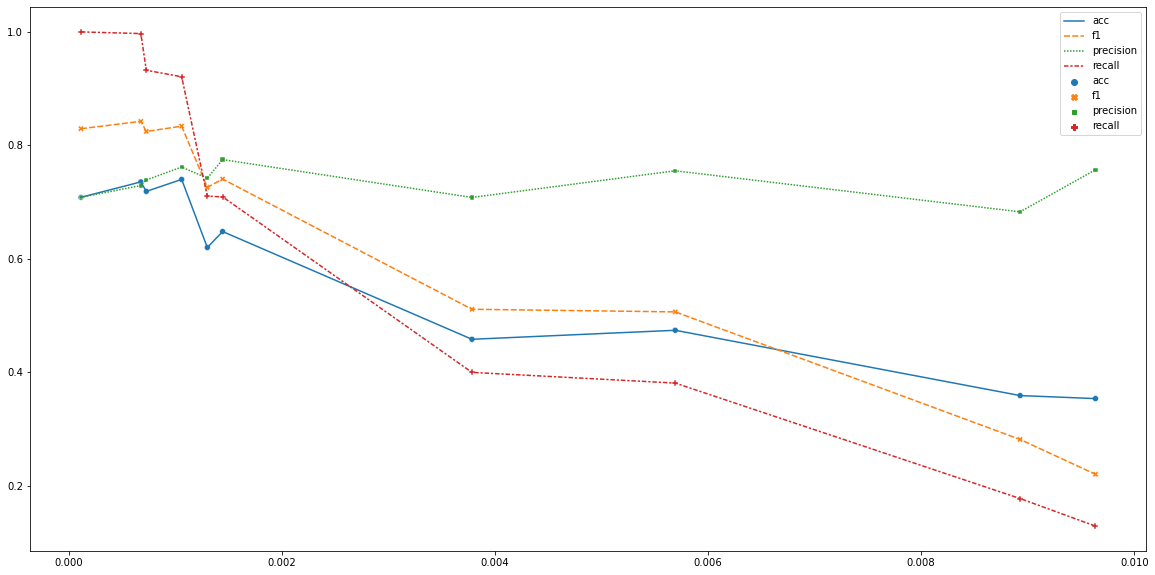

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


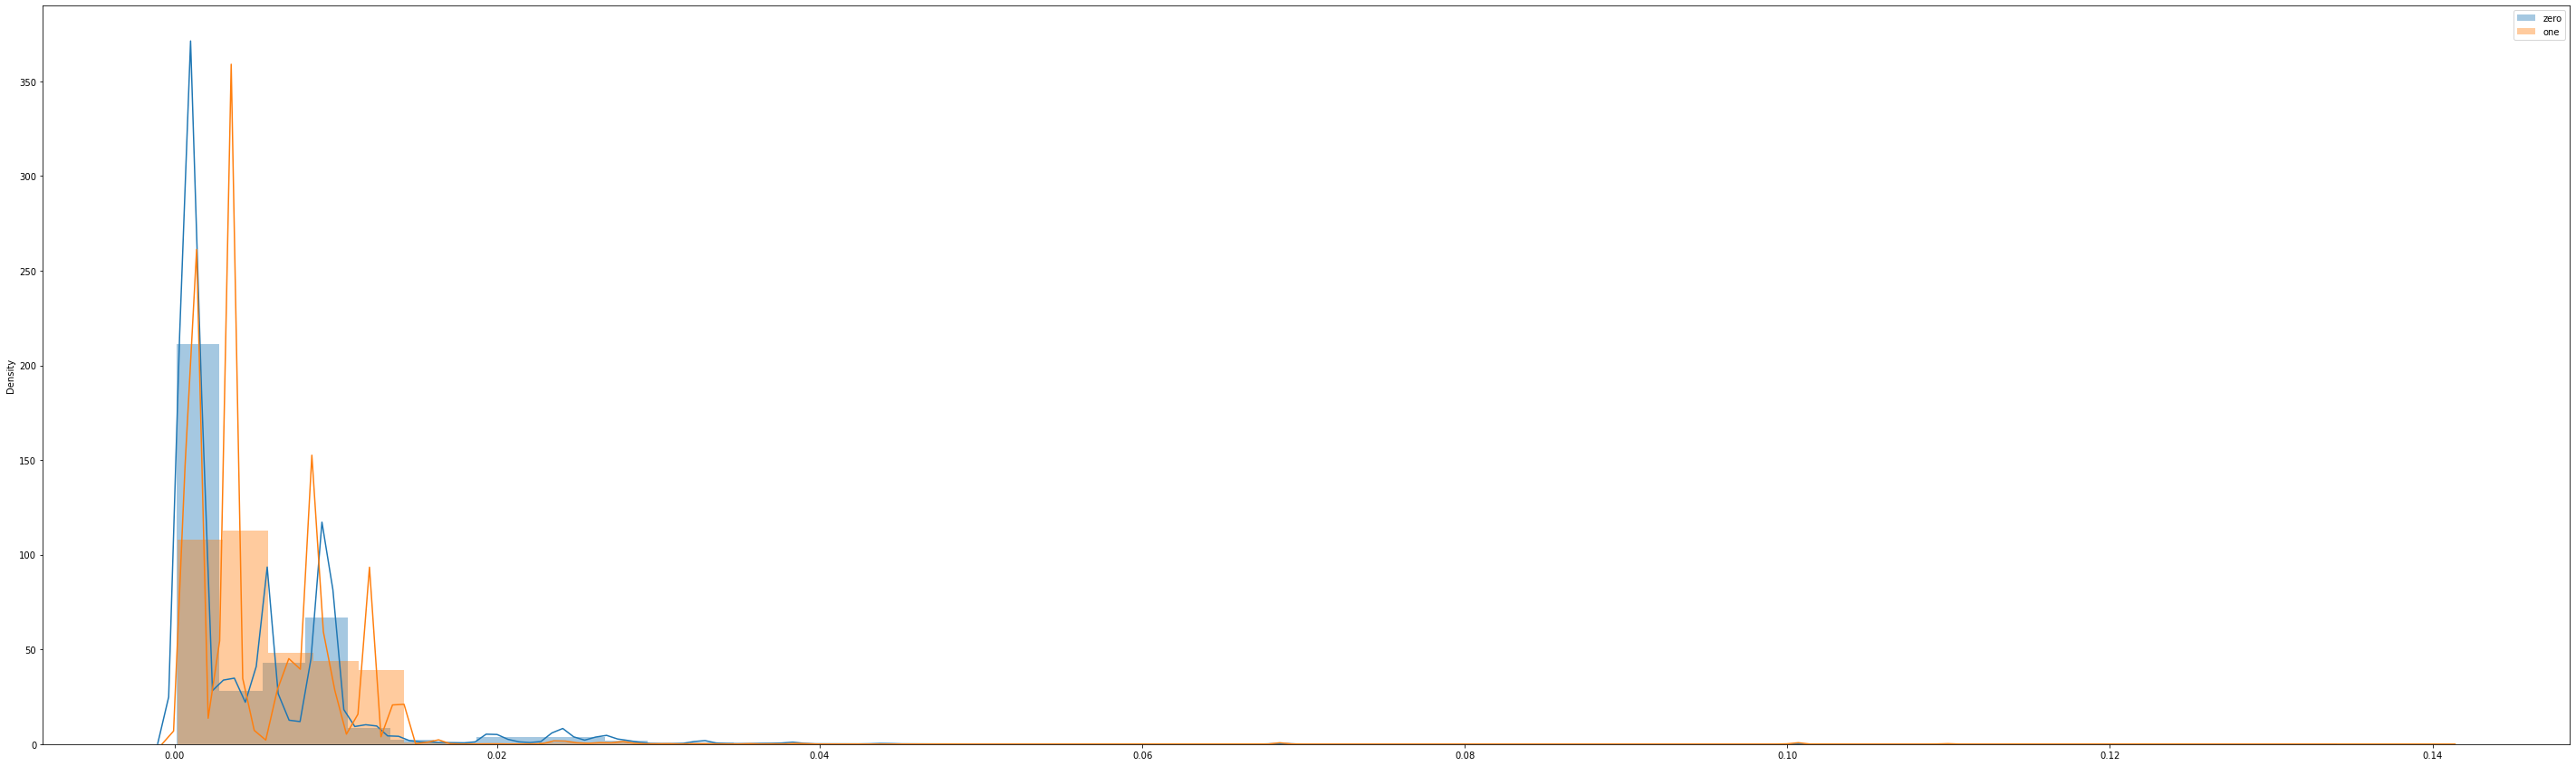

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 15))
sns.distplot(zero1, label='zero')
sns.distplot(one1, label='one')
plt.legend()
plt.show()

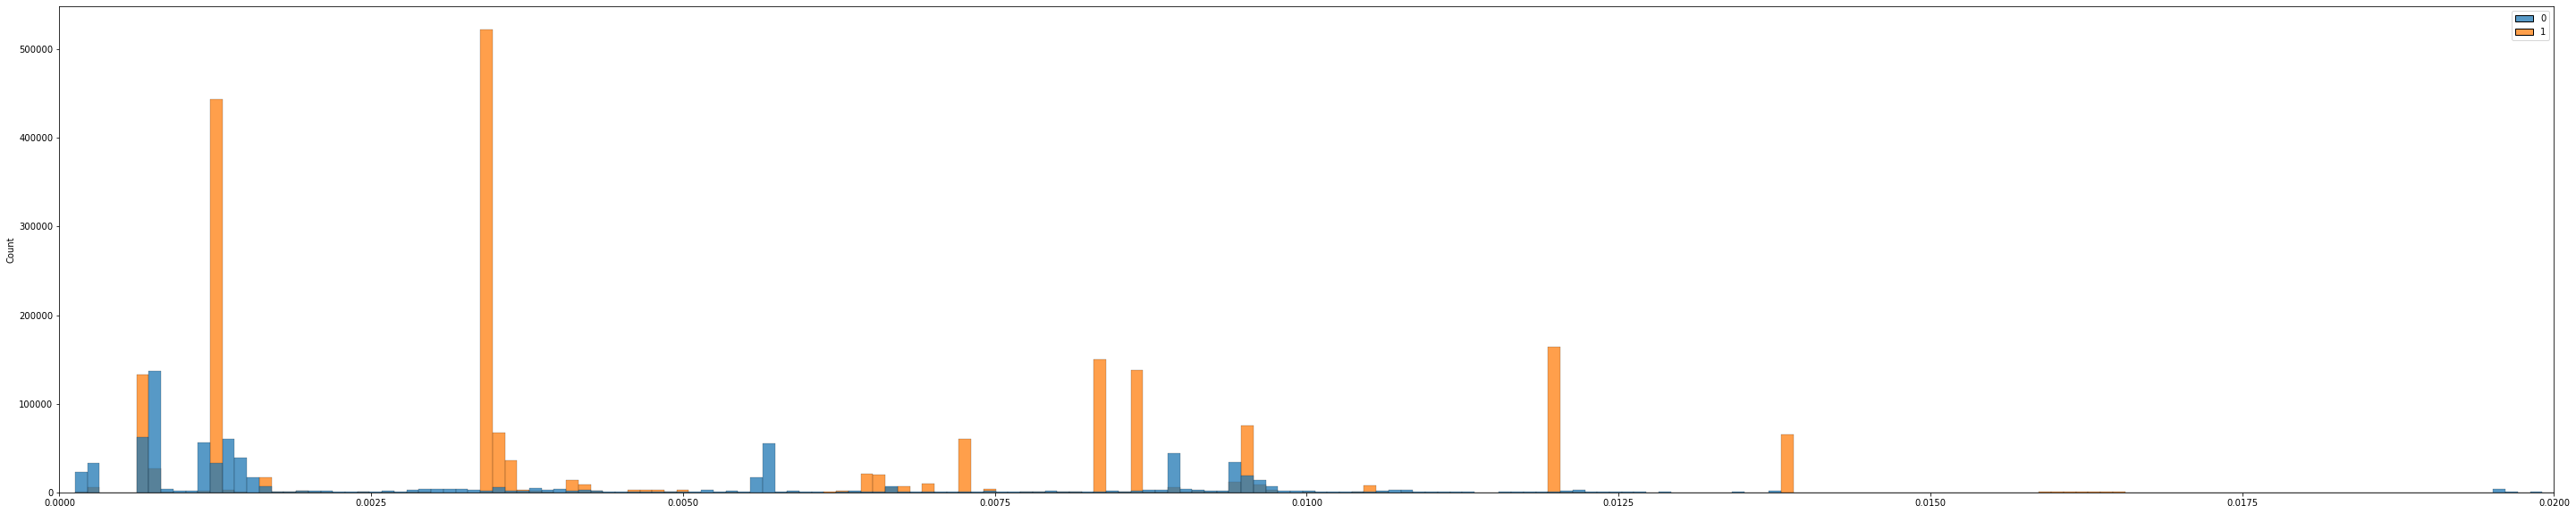

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero1, one1])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

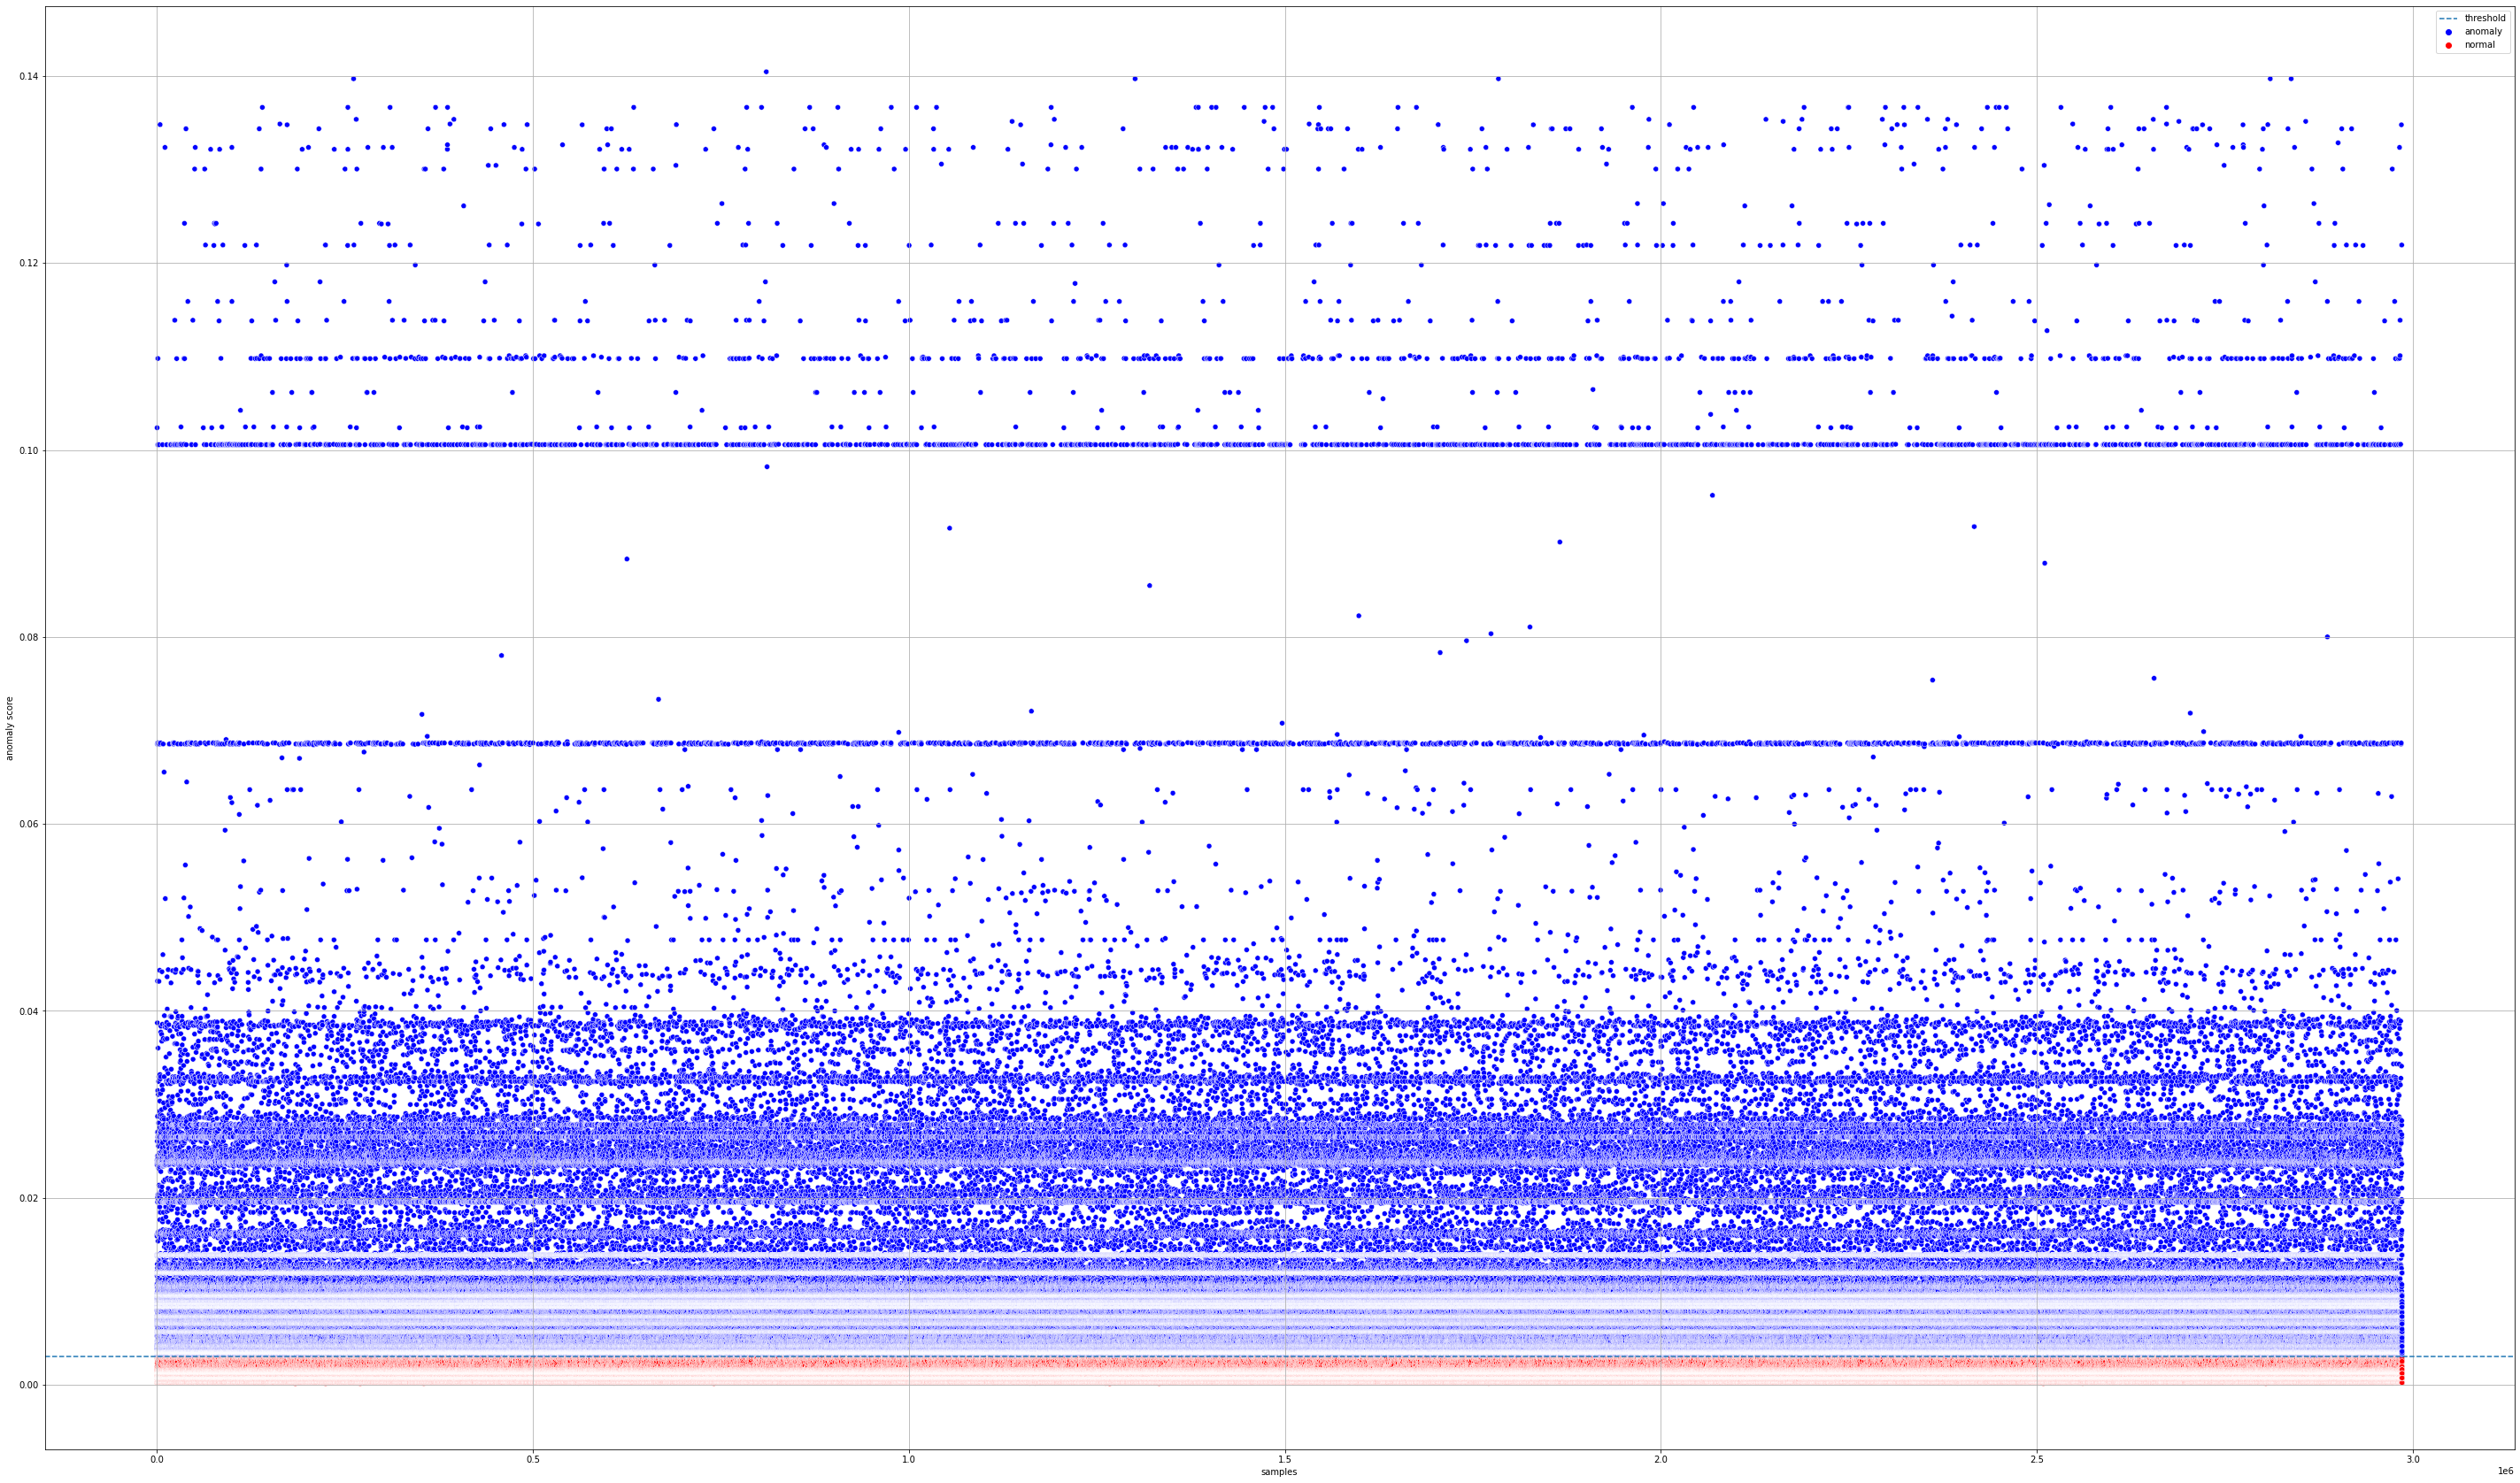

In [40]:
def get_loss(x):
  if x > 0.003 : 
    return 1
  else : 
    return 0
loss_df = pd.Series(total_loss1)
loss_df2 = loss_df.apply(get_loss)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50,30))
sns.scatterplot(x=np.arange(0, len(loss_df)), y= loss_df, hue=['normal' if i==0 else 'anomaly' for i in loss_df2],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = 0.003, linestyle='--', label='threshold')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()

##좀더 세분화

In [41]:
# code_size = 2
# model

# threshold
import numpy as np
threshold = list(set(np.percentile(train_loss_collection, range(0, 40, 5))))

from tqdm import tqdm
model_tcp_denoise.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(test_loader1): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model_tcp_denoise.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try : 
    acc = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
  except : 
    continue
  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|██████████████████████████████████████████████████████████████████████████████| 5832/5832 [15:45<00:00,  6.17it/s]


tp      fp      tn      fn       acc        f1 precision  \
0.000111  2114986  870681       0       0   0.70838    0.8293   0.70838   
0.000256  2111277  827150   43531    3709  0.721717  0.835585  0.718506   
0.000725  1971993  696530  174151  142993  0.718816  0.824496  0.738983   
0.000674  2108782  783338   87343    6204  0.735556  0.842316  0.729147   
0.000719  1973961  739674  131007  141025  0.705024  0.817609  0.727423   
0.000729  1967852  652618  218063  147134  0.732136  0.831114  0.750954   
0.001057  1947754  609204  261477  167232  0.739946  0.833809  0.761747   
0.001159  1947134  566095  304586  167852  0.754177  0.841419  0.774754   

            recall  
0.000111         1  
0.000256  0.998246  
0.000725  0.932391  
0.000674  0.997067  
0.000719  0.933321  
0.000729  0.930433  
0.001057   0.92093  
0.001159  0.920637

In [43]:
test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']] = test_result[['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall']].apply(pd.to_numeric)

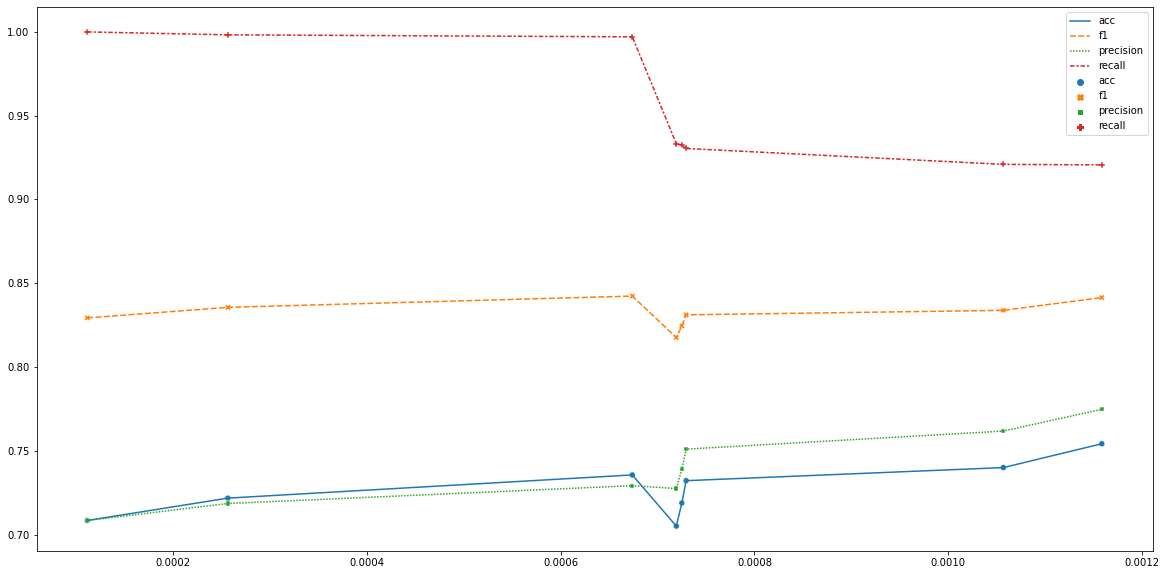

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


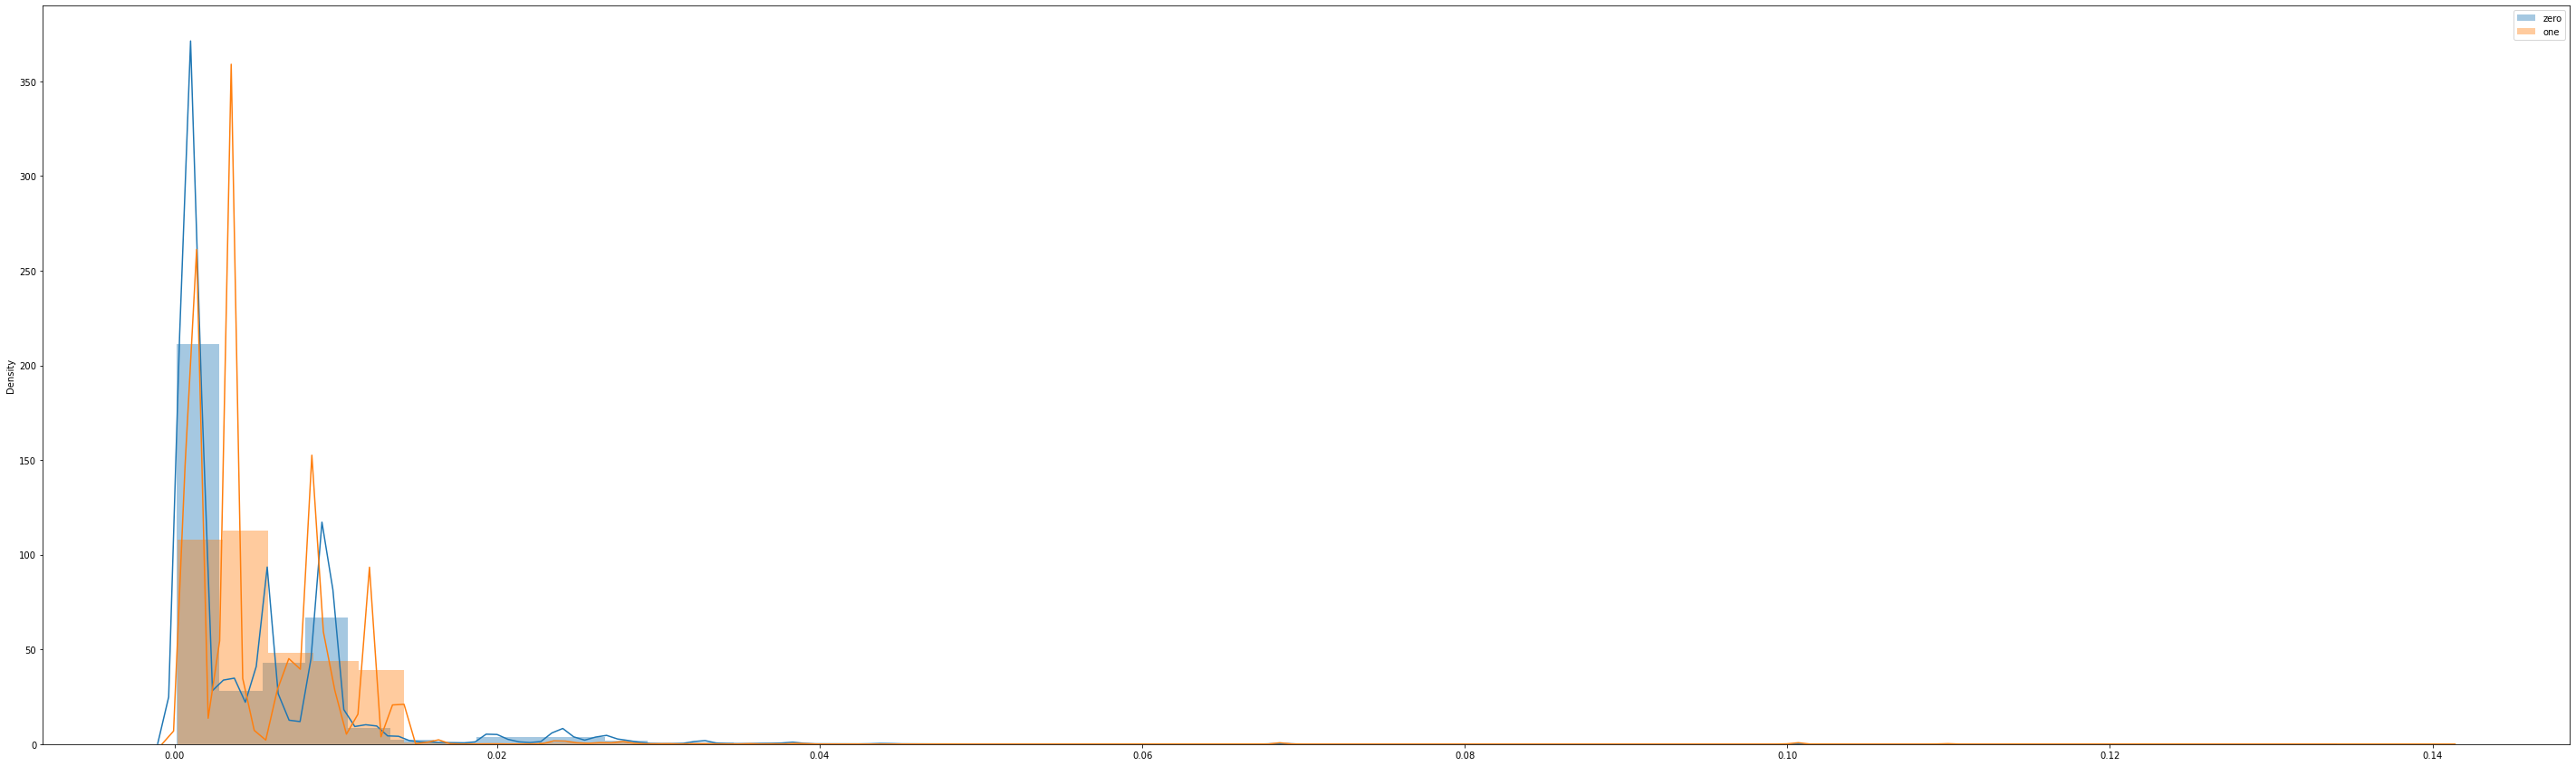

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 15))
sns.distplot(zero1, label='zero')
sns.distplot(one1, label='one')
plt.legend()
plt.show()

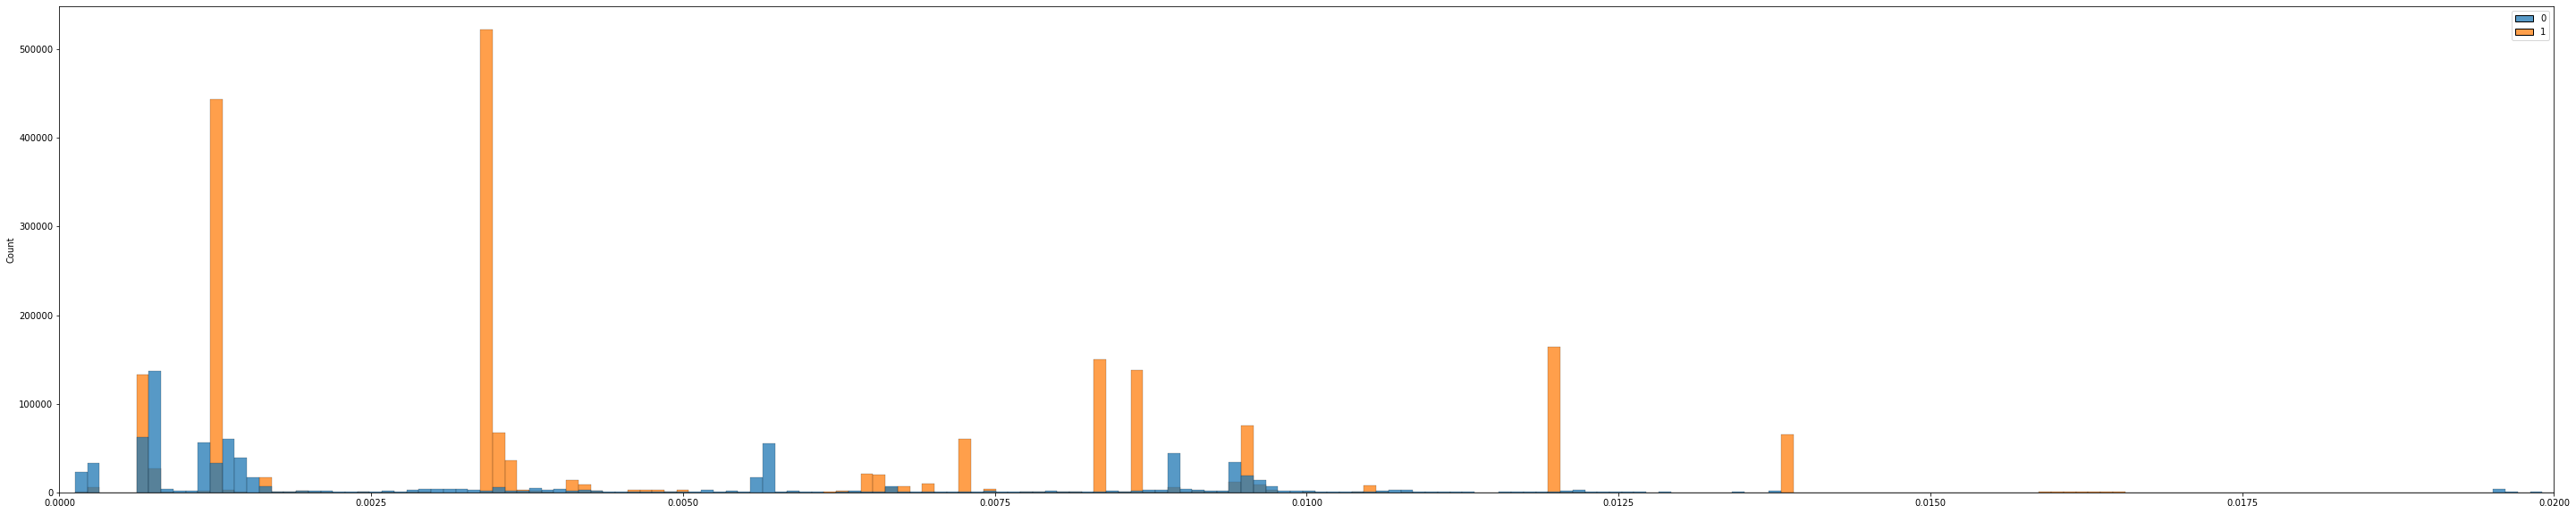

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.histplot([zero1, one1])
# plt.legend()
plt.xlim(0, 0.02)
plt.show()

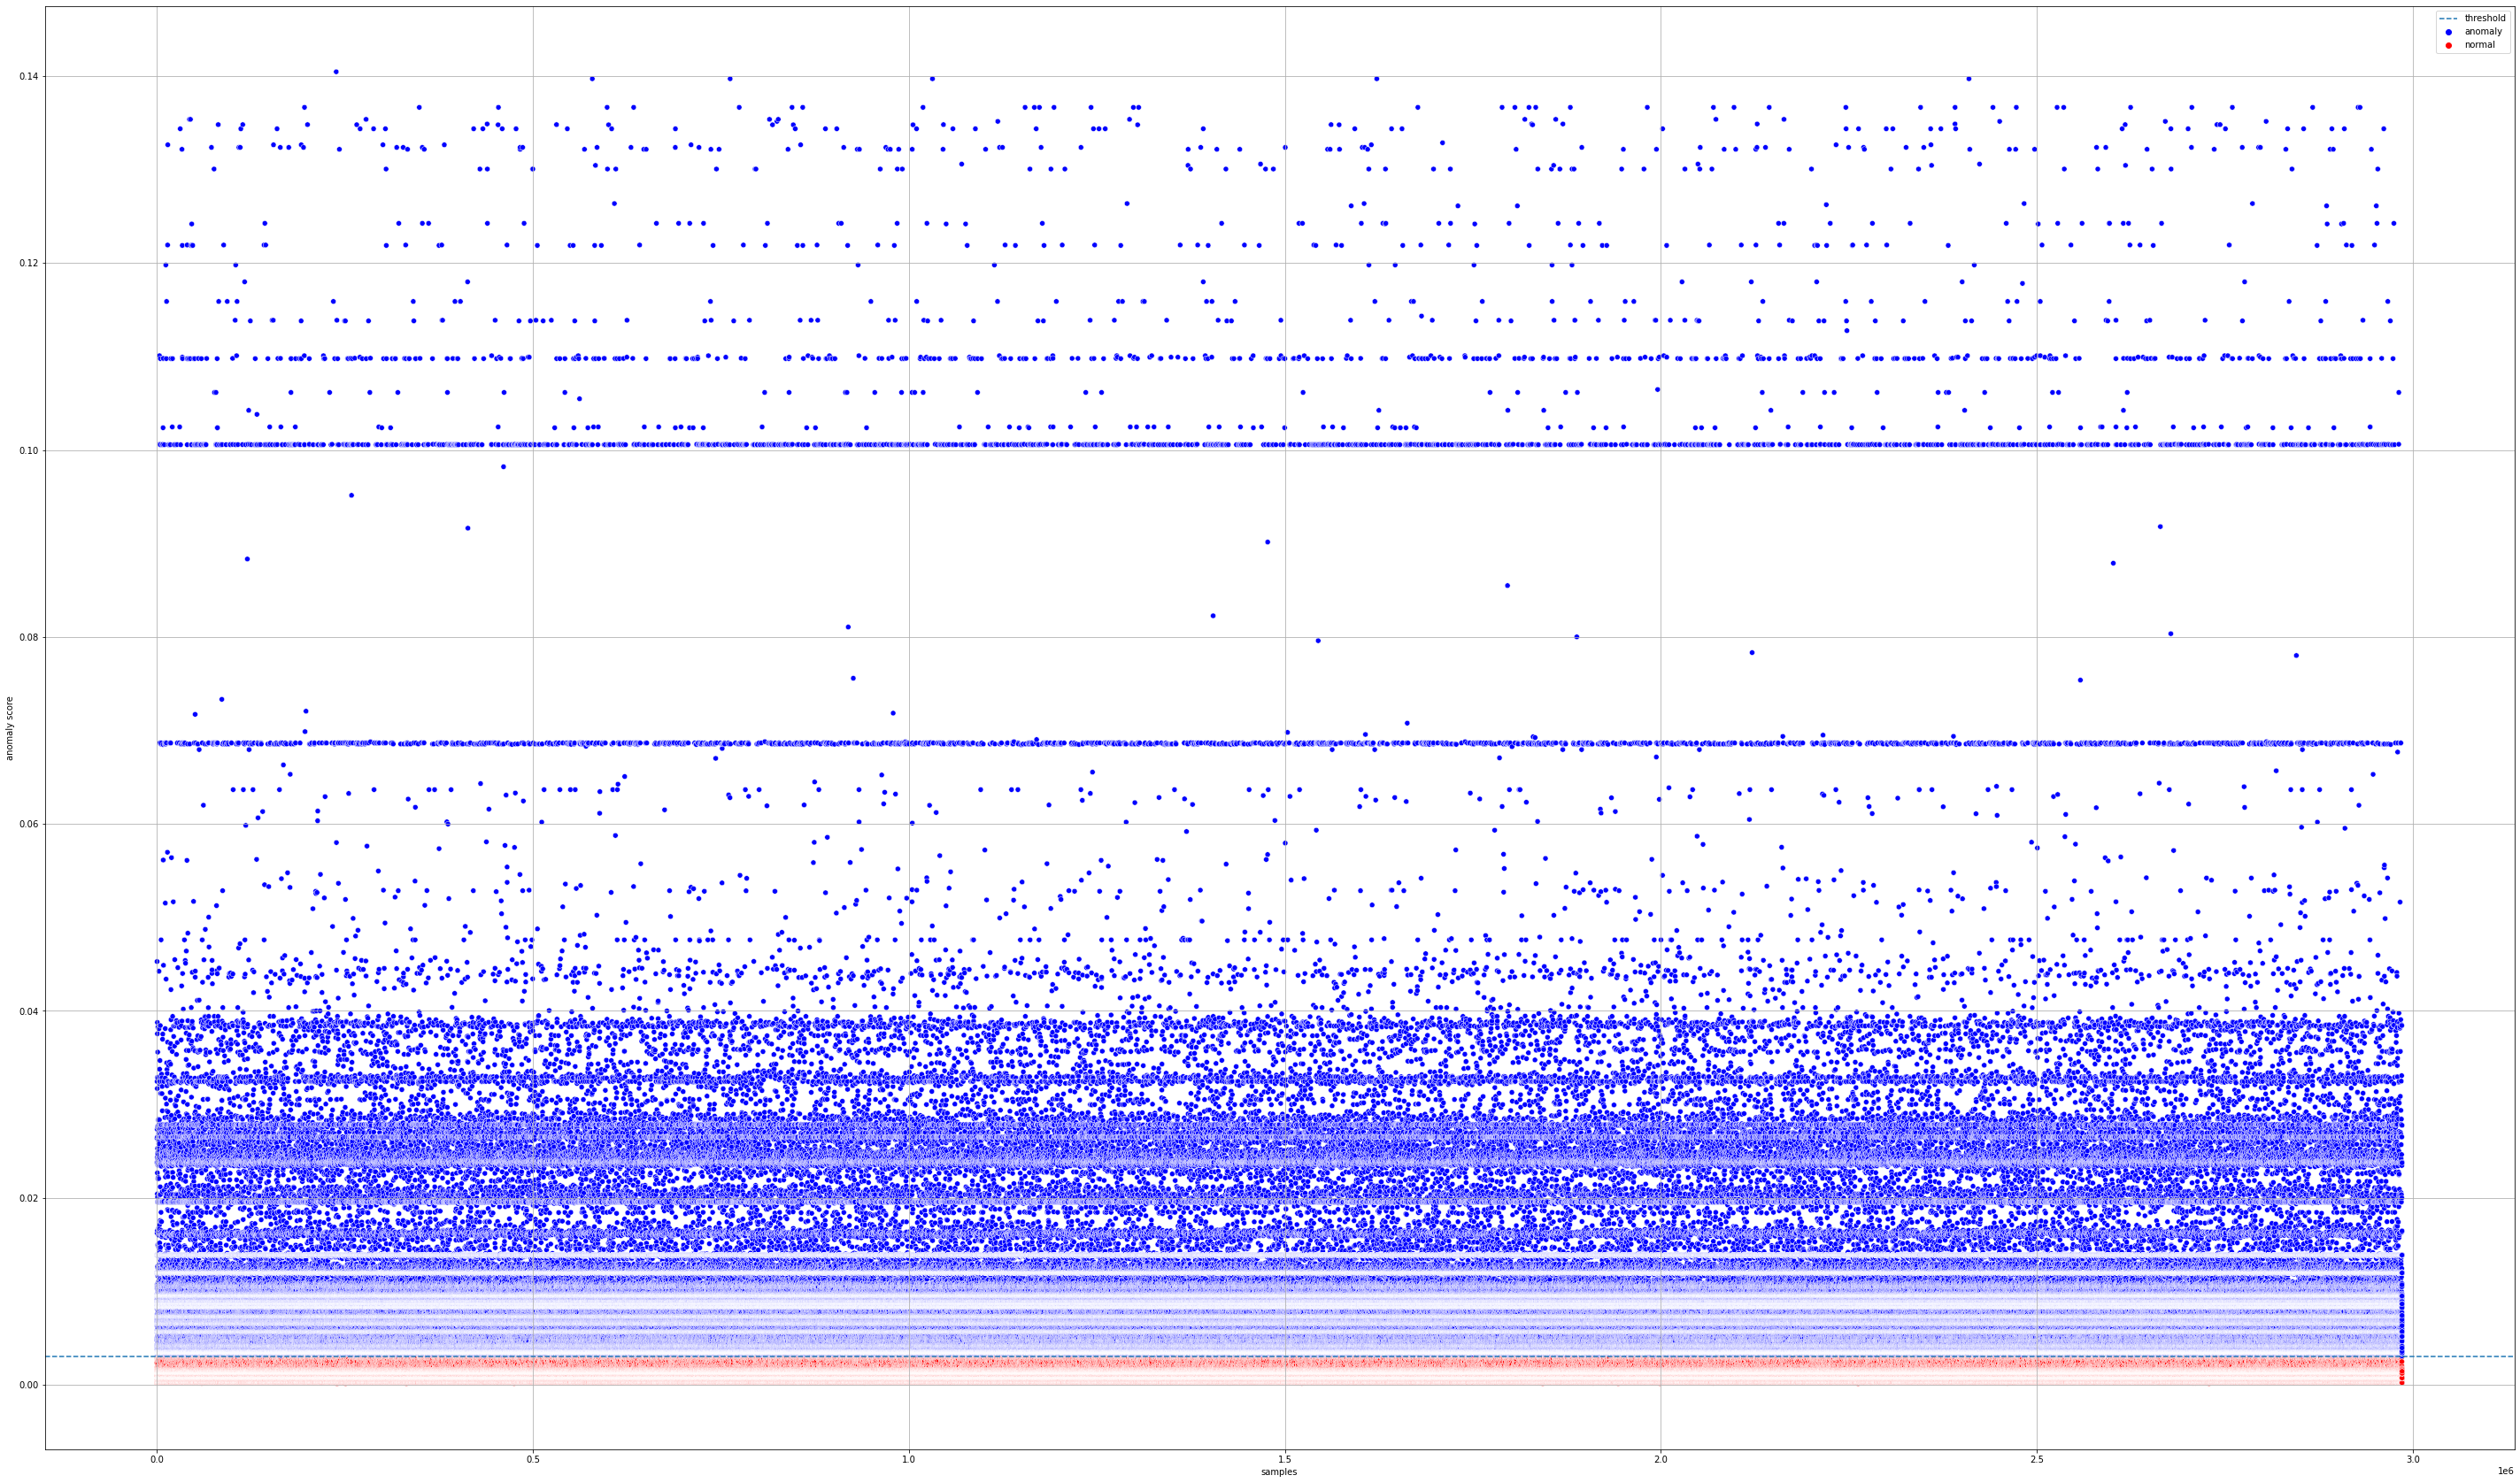

In [47]:
def get_loss(x):
  if x > 0.003 : 
    return 1
  else : 
    return 0
loss_df = pd.Series(total_loss1)
loss_df2 = loss_df.apply(get_loss)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50,30))
sns.scatterplot(x=np.arange(0, len(loss_df)), y= loss_df, hue=['normal' if i==0 else 'anomaly' for i in loss_df2],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = 0.003, linestyle='--', label='threshold')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()

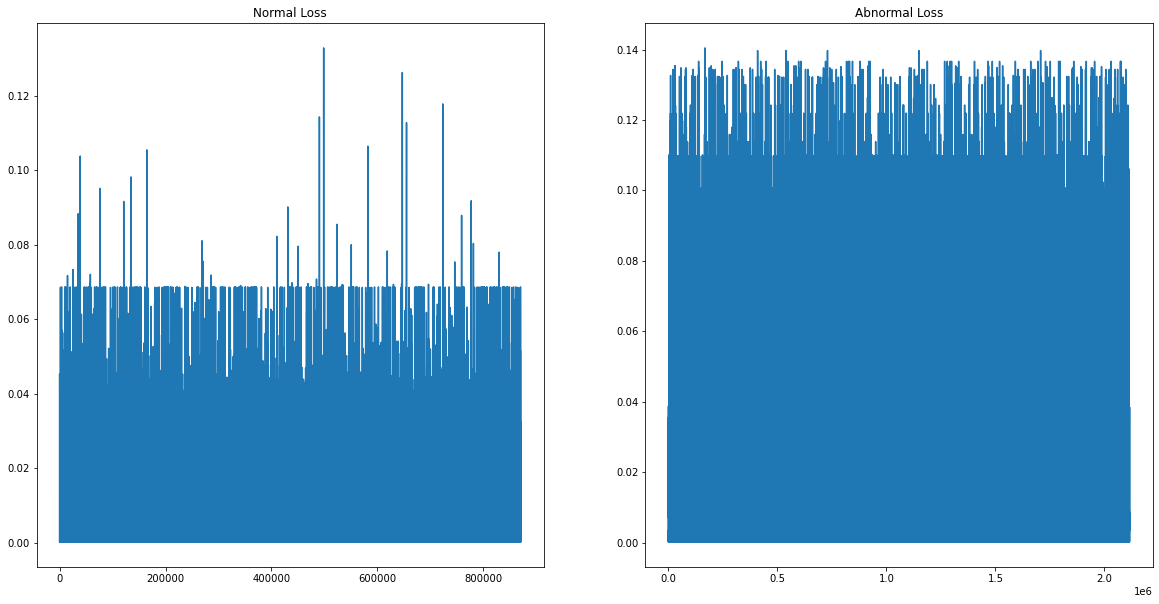

In [49]:
zero_df = pd.DataFrame(zero1)
one_df = pd.DataFrame(one1)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(zero_df)
plt.title('Normal Loss')

plt.subplot(1,2,2)
plt.plot(one_df)
plt.title('Abnormal Loss')

plt.show()

# Feature Selection

In [44]:
!pip install catboost

     |████████████████████████████████| 12.7 MB 11.0 MB/s eta 0:00:01


In [46]:
!pip install eli5

     |████████████████████████████████| 106 kB 3.3 MB/s eta 0:00:01


In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import eli5
from eli5.sklearn import PermutationImportance

In [48]:
from dask_ml.preprocessing import MinMaxScaler, LabelEncoder

X = tcp.drop(columns=['Dst Port', 'Label', 'Type', 'Protocol'])
y = tcp['Type']
y_ml = tcp['Label']

# scale
mm = MinMaxScaler()
X_mm = mm.fit_transform(X)

In [49]:
X

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
3              6453966            15            10             1239   
4              8804066            14            11             1143   
5              6989341            16            12             1239   
8               476513             5             3              211   
9               475048             5             3              220   
...                ...           ...           ...              ...   
8247866        1721142             8             7             1128   
8247868         114340             2             1                0   
8247869        1404866             8             7             1132   
8247870        3966663            14             7             1386   
8247871       86637706             2             0                0   

         TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
3                 2273.0              744                0             82.60   
4                 2209.0              744                0             81.60   
5                 2273.0              744                0             77.44   
8                  463.0              211                0             42.20   
9                  472.0              220                0             44.00   
...                  ...              ...              ...               ...   
8247866           1581.0              661                0            141.00   
8247868              0.0                0                0              0.00   
8247869           1581.0              661                0            141.50   
8247870            392.0              680                0             99.00   
8247871              0.0                0                0              0.00   

         Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd Act Data Pkts  \
3                  196.8              976  ...                  6   
4                  203.8              976  ...                  6   
5                  190.9              976  ...                  7   
8                   94.4              463  ...                  1   
9                   98.4              472  ...                  1   
...                  ...              ...  ...                ...   
8247866            222.6             1173  ...                  5   
8247868              0.0                0  ...                  0   
8247869            222.8             1173  ...                  5   
8247870            189.2              291  ...                  7   
8247871              0.0                0  ...                  0   

         Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
3                      32          0.0         0.0         0.0         0.0   
4                      32          0.0         0.0         0.0         0.0   
5                      20          0.0         0.0         0.0         0.0   
8                      32          0.0         0.0         0.0         0.0   
9                      32          0.0         0.0         0.0         0.0   
...                   ...          ...         ...         ...         ...   
8247866                20          0.0         0.0         0.0         0.0   
8247868                20          0.0         0.0         0.0         0.0   
8247869                20          0.0         0.0         0.0         0.0   
8247870                20          0.0         0.0         0.0         0.0   
8247871                20          0.0         0.0         0.0         0.0   

          Idle Mean  Idle Std    Idle Max    Idle Min  
3               0.0       0.0         0.0         0.0  
4               0.0       0.0         0.0         0.0  
5               0.0       0.0         0.0         0.0  
8               0.0       0.0         0.0         0.0  
9               0.0       0.0         0.0         0.0  
...             ...       ...         ...         ...  
8247866         0.0       0.0        

In [51]:
y_ml

3          Benign
4          Benign
5          Benign
8          Benign
9          Benign
            ...  
8247866    Benign
8247868    Benign
8247869    Benign
8247870    Benign
8247871    Benign
Name: Label, Length: 6468388, dtype: object

In [52]:
tcp_abnormal

Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
94             21         6             19             1             1   
95             21         6              3             1             1   
96             21         6              3             1             1   
97             21         6              2             1             1   
98             21         6              2             1             1   
...           ...       ...            ...           ...           ...   
8211121       445         6         780351             5             3   
8211122      3389         6        2937271            10             7   
8211123       445         6         135614             3             1   
8211124     61209         6             27             2             0   
8211125      3389         6        3674777             9             7   

         TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
94                     0              0.0                0                0   
95                     0              0.0                0                0   
96                     0              0.0                0                0   
97                     0              0.0                0                0   
98                     0              0.0                0                0   
...                  ...              ...              ...              ...   
8211121               53            131.0               53                0   
8211122             1148           1581.0              677                0   
8211123                0              0.0                0                0   
8211124                0              0.0                0                0   
8211125             1148           1581.0              677                0   

         Fwd Pkt Len Mean  ...  Active Mean  Active Std  Active Max  \
94                   0.00  ...          0.0         0.0         0.0   
95                   0.00  ...          0.0         0.0         0.0   
96                   0.00  ...          0.0         0.0         0.0   
97                   0.00  ...          0.0         0.0         0.0   
98                   0.00  ...          0.0         0.0         0.0   
...                   ...  ...          ...         ...         ...   
8211121             10.60  ...          0.0         0.0         0.0   
8211122            114.80  ...          0.0         0.0         0.0   
8211123              0.00  ...          0.0         0.0         0.0   
8211124              0.00  ...          0.0         0.0         0.0   
8211125            127.56  ...          0.0         0.0         0.0   

         Active Min  Idle Mean  Idle Std  Idle Max  Idle Min           Label  \
94              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
95              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
96              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
97              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
98              0.0        0.0       0.0       0.0       0.0  FTP-BruteForce   
...             ...        ...       ...       ...       ...             ...   
8211121         0.0        0.0       0.0       0.0       0.0   Infilteration   
8211122         0.0        0.0       0.0       0.0       0.0   Infilteration   
8211123         0.0        0.0       0.0       0.0       0.0   Infilteration   
8211124         0.0        0.0       0.0       0.0       0.0   Infilteration   
8211125         0.0        0.0       0.0       0.0       0.0   Infilteration   

         Type  
94          1  
95          1  
96          1  
97          1  
98          1  
...       ...  
8211121     1  
8211122     1  
8211123     1  
8211124     1  
8211125     1  

[2114986 rows x 80 columns]

In [53]:
tcp_scale = pd.concat([X_mm,y,y_ml],axis=1)

# ML을 위해 정상, 비정상 데이터 맞춰주기
import random 
abnormal_tcp = tcp_scale[tcp_scale['Type']==1]
normal_tcp = tcp_scale[tcp_scale['Type']==0]
normal_idx = random.sample(list(normal_tcp.index),2114986)
normal_tcp_sample = normal_tcp.loc[normal_idx,:]

# X,y 분리
total_data_ml = pd.concat([normal_tcp_sample,abnormal_tcp])
total_train = total_data_ml.drop(['Type','Label'],axis=1)
total_test = total_data_ml['Label']

# 라벨 인코더 
le = LabelEncoder()
y_ml = le.fit_transform(total_test)

from dask_ml.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(total_train, y_ml, test_size=0.2, random_state=13)


In [54]:
total_train

Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
4536110   1.666193e-02      0.000121      0.000057         0.000131   
6554986   3.411285e-02      0.000069      0.000024         0.000107   
4089786   2.258333e-06      0.000017      0.000000         0.000000   
6875138   3.072476e-02      0.000069      0.000024         0.000107   
7448088   1.500000e-06      0.000034      0.000000         0.000009   
...                ...           ...           ...              ...   
8211121   6.502917e-03      0.000069      0.000024         0.000006   
8211122   2.447725e-02      0.000155      0.000057         0.000131   
8211123   1.130108e-03      0.000034      0.000008         0.000000   
8211124   2.166667e-07      0.000017      0.000000         0.000000   
8211125   3.062313e-02      0.000138      0.000057         0.000131   

         TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
4536110     1.011125e-05         0.010506              0.0          0.008651   
6554986     2.302373e-06         0.014510              0.0          0.011313   
4089786     0.000000e+00         0.000000              0.0          0.000000   
6875138     1.995390e-06         0.014510              0.0          0.011313   
7448088     0.000000e+00         0.000714              0.0          0.001553   
...                  ...              ...              ...               ...   
8211121     8.378079e-07         0.000822              0.0          0.000641   
8211122     1.011125e-05         0.010506              0.0          0.006945   
8211123     0.000000e+00         0.000000              0.0          0.000000   
8211124     0.000000e+00         0.000000              0.0          0.000000   
8211125     1.011125e-05         0.010506              0.0          0.007717   

         Fwd Pkt Len Std  Bwd Pkt Len Max  ...  Fwd Act Data Pkts  \
4536110         0.012391         0.037275  ...           0.001113   
6554986         0.022728         0.011440  ...           0.000223   
4089786         0.000000         0.000000  ...           0.000000   
6875138         0.022728         0.009915  ...           0.000223   
7448088         0.001274         0.000000  ...           0.000223   
...                  ...              ...  ...                ...   
8211121         0.001288         0.004163  ...           0.000223   
8211122         0.011418         0.037275  ...           0.001113   
8211123         0.000000         0.000000  ...           0.000000   
8211124         0.000000         0.000000  ...           0.000000   
8211125         0.011891         0.037275  ...           0.001113   

         Fwd Seg Size Min  Active Mean  Active Std  Active Max  Active Min  \
4536110          0.000000          0.0         0.0         0.0         0.0   
6554986          0.333333          0.0         0.0         0.0         0.0   
4089786          0.000000          0.0         0.0         0.0         0.0   
6875138          0.333333          0.0         0.0         0.0         0.0   
7448088          0.000000          0.0         0.0         0.0         0.0   
...                   ...          ...         ...         ...         ...   
8211121          0.000000          0.0         0.0         0.0         0.0   
8211122          0.000000          0.0         0.0         0.0         0.0   
8211123          0.000000          0.0         0.0         0.0         0.0   
8211124          0.000000          0.0         0.0         0.0         0.0   
8211125          0.000000          0.0         0.0         0.0         0.0   

         Idle Mean  Idle Std  Idle Max  Idle Min  
4536110        0.0       0.0       0.0       0.0  
6554986        0.0       0.0       0.0       0.0  
4089786        0.0       0.0       0.0       0.0  
6875138        0.0       0.0       0.0       0.0  
7448088        0.0       0.0       0.0       0.0  
...            ...       ...       ...       ...  
8211121        0.0       0.0       0.0       0.0  
8211122        0.0   

In [55]:
y_ml

array([ 0,  0,  0, ..., 10, 10, 10])

In [56]:
model = [RandomForestClassifier(),DecisionTreeClassifier(),LogisticRegression(),LGBMClassifier(),CatBoostClassifier()]

In [57]:
from tqdm import tqdm
from sklearn.metrics import f1_score, recall_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix

feature_import = pd.DataFrame(columns = ['f1','recall','precision','column'],index=['rf','dt','lr','lgbm','cat'])
name = ['rf','dt','lr','lgbm','cat']
for idx,m in tqdm(enumerate(model)):
  model_fit = m.fit(X_train,y_train)
  y_pred = m.predict(X_test)
  f1 = f1_score(y_test,y_pred,average='micro')
  recall = recall_score(y_test,y_pred,average='micro')
  precision = precision_score(y_test,y_pred,average='micro')

  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  
  perm = PermutationImportance(model_fit,scoring='f1_micro',random_state=13).fit(X_test,y_test)

  temp = eli5.explain_weights_df(perm)
  important_cols = temp[temp['weight']>0]['feature'].map(lambda x : int(x.replace('x',''))).values
  #print(important_cols)
  column = X_train.columns[important_cols].values
  #print(column)
  
  feature_import.loc[name[idx]] = [f1,recall,precision,column]

0it [00:00, ?it/s]

[[417236    830      0      0     35      1     13      7      7      0
    4489      0      0]
 [    84  57147      0      0      0      0      0      0      0      0
       0      0      0]
 [    44      3     53      0      0      0      0      0      0      0
       0      0      0]
 [    12      5      0     27      0      0      0      0      0      0
       0      0      0]
 [   105      0      0      0 137148      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0   8386      0      0      0      0
       0      0      0]
 [     0      0      0      0      0      1  92508      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0  14608      0  13414
       0      0      0]
 [    27      0      0      0      0      0      0      0   2130      0
       0      0      0]
 [     0      0      0      0      0      0      0   4592      0  34141
       0      0      0]
 [ 15905     52      0      0     22    

/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
1it [2:00:28, 7228.22s/it]

[[412104    189      2      1      1      0      0      0      8      0
   10310      1      2]
 [    58  57169      0      2      0      0      0      0      0      0
       2      0      0]
 [     3      0     90      0      0      0      0      0      0      0
       3      4      0]
 [     3      3      2     35      0      0      0      0      0      0
       1      0      0]
 [     0      0      0      0 137253      0      0      0      0      0
       0      0      0]
 [     0      0      0      0      0   8385      1      0      0      0
       0      0      0]
 [     0      0      0      0      0      2  92507      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0  14379      0  13643
       0      0      0]
 [    28      0      0      0      0      0      0      0   2129      0
       0      0      0]
 [     0      0      0      0      0      0      0   4266      0  34467
       0      0      0]
 [ 14596      7      0      0      1    

/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
2it [2:06:22, 3184.47s/it]/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[412542    836      8      0   4219    213    364    223    233      5
    1274      0   2701]
 [ 28517  28707      0      0      0      0      0      0      0      0
       7      0      0]
 [   100      0      0      0      0      0      0      0      0      0
       0      0      0]
 [    44      0      0      0      0      0      0      0      0      0
       0      0      0]
 [    14      0      0      0 137239      0      0      0      0      0
       0      0      0]
 [  1222      0      0      0      0   5517   1449      0      3      0
       0      0    195]
 [   542      0      0      0      0   2817  89150      0      0      0
       0      0      0]
 [     0      0      0      0      0      0      0  15427      0  12595
       0      0      0]
 [   129      0      0      0      0     34      8    475   1505      0
       0      0      6]
 [     0      0      0      0      0      0      0   8417      0  30316
       0      0      0]
 [ 19691    324      2      0    319    

/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    422618
           1       0.96      0.50      0.66     57231
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00        44
           4       0.97      1.00      0.98    137253
           5       0.63      0.66      0.64      8386
           6       0.98      0.96      0.97     92509
           7       0.63      0.55      0.59     28022
           8       0.86      0.70      0.77      2157
           9       0.71      0.78      0.74     38733
          10       0.35      0.03      0.06     21482
          11       0.00      0.00      0.00        18
          12       0.93      1.00      0.96     37442

    accuracy                           0.90    845995
   macro avg       0.61      0.55      0.56    845995
weighted avg       0.89      0.90      0.88    845995



/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
3it [2:13:28, 1925.02s/it]

[[321141   3645      7    105  46854  18686   3082  12477   2426   1612
    6734     21   5828]
 [  1254  52577      0      0     12    105     12      6      0   3199
      28      0     38]
 [    20      4      0      0      3     52      0      4     12      0
       1      0      4]
 [    22      5      0      0      0      0      0      7      4      4
       0      0      2]
 [  5396      0      0      0 131759      0     32     11      0     49
       0      0      6]
 [  2882      1      0      0    815   4382      7    222      0     24
      21      0     32]
 [   873    946      0     11    127   1955  84798      7    504      4
    3243      0     41]
 [   223      0      0      0      0      0     16  26545      0   1238
       0      0      0]
 [  1067    117      0      0      5      5      0    540     17     46
     322      0     38]
 [  2687      0      0      0      0      0     14  19670      0  16362
       0      0      0]
 [ 11912    524      1      6   2827    

/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
4it [3:17:58, 2692.87s/it]

Learning rate set to 0.119763
0:	learn: 1.4268735	total: 5.91s	remaining: 1h 38m 26s
1:	learn: 1.1470829	total: 10.6s	remaining: 1h 28m 31s
2:	learn: 0.9622745	total: 15.2s	remaining: 1h 23m 57s
3:	learn: 0.8247645	total: 19.4s	remaining: 1h 20m 29s
4:	learn: 0.7224283	total: 23.6s	remaining: 1h 18m 14s
5:	learn: 0.6387543	total: 28.1s	remaining: 1h 17m 31s
6:	learn: 0.5697883	total: 32.7s	remaining: 1h 17m 20s
7:	learn: 0.5138775	total: 37.2s	remaining: 1h 16m 51s
8:	learn: 0.4667176	total: 41.7s	remaining: 1h 16m 28s
9:	learn: 0.4262158	total: 46.2s	remaining: 1h 16m 9s
10:	learn: 0.3921033	total: 50.4s	remaining: 1h 15m 29s
11:	learn: 0.3624584	total: 55.7s	remaining: 1h 16m 23s
12:	learn: 0.3359063	total: 1m	remaining: 1h 16m 42s
13:	learn: 0.3137069	total: 1m 5s	remaining: 1h 17m 20s
14:	learn: 0.2937353	total: 1m 10s	remaining: 1h 17m 14s
15:	learn: 0.2754131	total: 1m 15s	remaining: 1h 17m
16:	learn: 0.2601441	total: 1m 19s	remaining: 1h 16m 59s
17:	learn: 0.2463533	total: 1m 24

144:	learn: 0.1110992	total: 12m 21s	remaining: 1h 12m 53s
145:	learn: 0.1109368	total: 12m 27s	remaining: 1h 12m 53s
146:	learn: 0.1108479	total: 12m 33s	remaining: 1h 12m 52s
147:	learn: 0.1106815	total: 12m 39s	remaining: 1h 12m 51s
148:	learn: 0.1106497	total: 12m 45s	remaining: 1h 12m 50s
149:	learn: 0.1105381	total: 12m 51s	remaining: 1h 12m 49s
150:	learn: 0.1105218	total: 12m 57s	remaining: 1h 12m 50s
151:	learn: 0.1104023	total: 13m 3s	remaining: 1h 12m 49s
152:	learn: 0.1103185	total: 13m 9s	remaining: 1h 12m 48s
153:	learn: 0.1102588	total: 13m 14s	remaining: 1h 12m 46s
154:	learn: 0.1102034	total: 13m 20s	remaining: 1h 12m 44s
155:	learn: 0.1101547	total: 13m 27s	remaining: 1h 12m 46s
156:	learn: 0.1101155	total: 13m 32s	remaining: 1h 12m 44s
157:	learn: 0.1100207	total: 13m 38s	remaining: 1h 12m 42s
158:	learn: 0.1099768	total: 13m 44s	remaining: 1h 12m 40s
159:	learn: 0.1099205	total: 13m 50s	remaining: 1h 12m 37s
160:	learn: 0.1098604	total: 13m 55s	remaining: 1h 12m 35s

286:	learn: 0.1047542	total: 26m 6s	remaining: 1h 4m 50s
287:	learn: 0.1047350	total: 26m 11s	remaining: 1h 4m 46s
288:	learn: 0.1046770	total: 26m 17s	remaining: 1h 4m 41s
289:	learn: 0.1046051	total: 26m 23s	remaining: 1h 4m 37s
290:	learn: 0.1045827	total: 26m 29s	remaining: 1h 4m 33s
291:	learn: 0.1045745	total: 26m 35s	remaining: 1h 4m 29s
292:	learn: 0.1045029	total: 26m 41s	remaining: 1h 4m 24s
293:	learn: 0.1044883	total: 26m 47s	remaining: 1h 4m 19s
294:	learn: 0.1044715	total: 26m 53s	remaining: 1h 4m 15s
295:	learn: 0.1044363	total: 26m 59s	remaining: 1h 4m 11s
296:	learn: 0.1044249	total: 27m 5s	remaining: 1h 4m 7s
297:	learn: 0.1044016	total: 27m 11s	remaining: 1h 4m 2s
298:	learn: 0.1043754	total: 27m 16s	remaining: 1h 3m 57s
299:	learn: 0.1043548	total: 27m 22s	remaining: 1h 3m 53s
300:	learn: 0.1043415	total: 27m 28s	remaining: 1h 3m 48s
301:	learn: 0.1043293	total: 27m 34s	remaining: 1h 3m 44s
302:	learn: 0.1043118	total: 27m 40s	remaining: 1h 3m 39s
303:	learn: 0.1043

432:	learn: 0.1023949	total: 39m 59s	remaining: 52m 22s
433:	learn: 0.1023866	total: 40m 4s	remaining: 52m 15s
434:	learn: 0.1023816	total: 40m 8s	remaining: 52m 8s
435:	learn: 0.1023775	total: 40m 12s	remaining: 52m 1s
436:	learn: 0.1023707	total: 40m 17s	remaining: 51m 54s
437:	learn: 0.1023541	total: 40m 21s	remaining: 51m 47s
438:	learn: 0.1023445	total: 40m 26s	remaining: 51m 40s
439:	learn: 0.1023403	total: 40m 30s	remaining: 51m 33s
440:	learn: 0.1023350	total: 40m 35s	remaining: 51m 26s
441:	learn: 0.1023323	total: 40m 39s	remaining: 51m 19s
442:	learn: 0.1023235	total: 40m 44s	remaining: 51m 13s
443:	learn: 0.1023198	total: 40m 48s	remaining: 51m 6s
444:	learn: 0.1022948	total: 40m 52s	remaining: 50m 59s
445:	learn: 0.1022860	total: 40m 58s	remaining: 50m 53s
446:	learn: 0.1022817	total: 41m 3s	remaining: 50m 47s
447:	learn: 0.1022755	total: 41m 7s	remaining: 50m 40s
448:	learn: 0.1022705	total: 41m 11s	remaining: 50m 33s
449:	learn: 0.1022625	total: 41m 15s	remaining: 50m 25s

580:	learn: 0.1013123	total: 51m 11s	remaining: 36m 55s
581:	learn: 0.1013080	total: 51m 16s	remaining: 36m 49s
582:	learn: 0.1013053	total: 51m 20s	remaining: 36m 43s
583:	learn: 0.1013030	total: 51m 24s	remaining: 36m 37s
584:	learn: 0.1013002	total: 51m 29s	remaining: 36m 31s
585:	learn: 0.1012984	total: 51m 33s	remaining: 36m 25s
586:	learn: 0.1012852	total: 51m 38s	remaining: 36m 19s
587:	learn: 0.1012824	total: 51m 43s	remaining: 36m 14s
588:	learn: 0.1012809	total: 51m 47s	remaining: 36m 8s
589:	learn: 0.1012792	total: 51m 51s	remaining: 36m 2s
590:	learn: 0.1012756	total: 51m 56s	remaining: 35m 56s
591:	learn: 0.1012710	total: 52m 1s	remaining: 35m 51s
592:	learn: 0.1012658	total: 52m 5s	remaining: 35m 45s
593:	learn: 0.1012640	total: 52m 9s	remaining: 35m 39s
594:	learn: 0.1012470	total: 52m 14s	remaining: 35m 33s
595:	learn: 0.1012410	total: 52m 18s	remaining: 35m 27s
596:	learn: 0.1012374	total: 52m 23s	remaining: 35m 21s
597:	learn: 0.1012338	total: 52m 27s	remaining: 35m 1

726:	learn: 0.1006048	total: 1h 4m 39s	remaining: 24m 16s
727:	learn: 0.1005917	total: 1h 4m 45s	remaining: 24m 11s
728:	learn: 0.1005888	total: 1h 4m 50s	remaining: 24m 6s
729:	learn: 0.1005874	total: 1h 4m 57s	remaining: 24m 1s
730:	learn: 0.1005844	total: 1h 5m 3s	remaining: 23m 56s
731:	learn: 0.1005786	total: 1h 5m 8s	remaining: 23m 51s
732:	learn: 0.1005754	total: 1h 5m 15s	remaining: 23m 46s
733:	learn: 0.1005701	total: 1h 5m 21s	remaining: 23m 40s
734:	learn: 0.1005637	total: 1h 5m 27s	remaining: 23m 35s
735:	learn: 0.1005616	total: 1h 5m 33s	remaining: 23m 30s
736:	learn: 0.1005593	total: 1h 5m 38s	remaining: 23m 25s
737:	learn: 0.1005576	total: 1h 5m 44s	remaining: 23m 20s
738:	learn: 0.1005508	total: 1h 5m 48s	remaining: 23m 14s
739:	learn: 0.1005452	total: 1h 5m 53s	remaining: 23m 8s
740:	learn: 0.1005415	total: 1h 5m 58s	remaining: 23m 3s
741:	learn: 0.1005326	total: 1h 6m 4s	remaining: 22m 58s
742:	learn: 0.1005311	total: 1h 6m 10s	remaining: 22m 53s
743:	learn: 0.1005297

867:	learn: 0.1000203	total: 1h 18m 19s	remaining: 11m 54s
868:	learn: 0.1000141	total: 1h 18m 25s	remaining: 11m 49s
869:	learn: 0.1000134	total: 1h 18m 31s	remaining: 11m 44s
870:	learn: 0.1000099	total: 1h 18m 37s	remaining: 11m 38s
871:	learn: 0.1000082	total: 1h 18m 43s	remaining: 11m 33s
872:	learn: 0.1000066	total: 1h 18m 49s	remaining: 11m 28s
873:	learn: 0.1000036	total: 1h 18m 55s	remaining: 11m 22s
874:	learn: 0.1000005	total: 1h 19m 1s	remaining: 11m 17s
875:	learn: 0.0999970	total: 1h 19m 7s	remaining: 11m 12s
876:	learn: 0.0999929	total: 1h 19m 13s	remaining: 11m 6s
877:	learn: 0.0999919	total: 1h 19m 19s	remaining: 11m 1s
878:	learn: 0.0999902	total: 1h 19m 25s	remaining: 10m 55s
879:	learn: 0.0999864	total: 1h 19m 31s	remaining: 10m 50s
880:	learn: 0.0999847	total: 1h 19m 37s	remaining: 10m 45s
881:	learn: 0.0999821	total: 1h 19m 42s	remaining: 10m 39s
882:	learn: 0.0999803	total: 1h 19m 48s	remaining: 10m 34s
883:	learn: 0.0999776	total: 1h 19m 54s	remaining: 10m 29s
8

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    422618
           1       1.00      1.00      1.00     57231
           2       0.91      0.82      0.86       100
           3       1.00      0.75      0.86        44
           4       1.00      1.00      1.00    137253
           5       1.00      1.00      1.00      8386
           6       1.00      1.00      1.00     92509
           7       0.77      0.51      0.62     28022
           8       1.00      0.99      0.99      2157
           9       0.72      0.89      0.79     38733
          10       0.64      0.22      0.33     21482
          11       0.90      0.50      0.64        18
          12       1.00      1.00      1.00     37442

    accuracy                           0.96    845995
   macro avg       0.91      0.82      0.85    845995
weighted avg       0.95      0.96      0.95    845995



/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
5it [5:01:39, 3619.97s/it]


In [58]:
feature_import

f1    recall precision  \
rf    0.953116  0.953116  0.953116   
dt    0.948993  0.948993  0.948993   
lr    0.896613  0.896613  0.896613   
lgbm  0.788377  0.788377  0.788377   
cat   0.955346  0.955346  0.955346   

                                                 column  
rf    [Init Fwd Win Byts, Fwd Seg Size Min, Fwd Head...  
dt    [Init Fwd Win Byts, Fwd Seg Size Min, Init Bwd...  
lr    [Fwd Seg Size Min, Init Fwd Win Byts, ACK Flag...  
lgbm  [Flow IAT Min, Init Fwd Win Byts, Flow IAT Mea...  
cat   [Init Fwd Win Byts, Fwd Seg Size Min, Fwd Pkts...

In [59]:
feature_import.loc['rf']['column']

array(['Init Fwd Win Byts', 'Fwd Seg Size Min', 'Fwd Header Len',
       'Flow Pkts/s', 'Bwd Pkts/s', 'Fwd Pkts/s', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'CWE Flag Count', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Bwd Pkt Len Min'], dtype=object)

In [60]:
feature_import.loc['dt']['column']

array(['Init Fwd Win Byts', 'Fwd Seg Size Min', 'Init Bwd Win Byts',
       'Fwd IAT Tot', 'Flow Duration', 'Flow IAT Mean', 'Bwd Header Len',
       'Fwd Pkts/s', 'Flow IAT Std', 'Flow IAT Max', 'Bwd Pkt Len Std',
       'Flow Pkts/s', 'Pkt Len Mean', 'Fwd Header Len', 'Fwd IAT Std',
       'Pkt Len Max', 'Fwd IAT Min', 'Bwd Pkts/s', 'Fwd IAT Max',
       'Bwd IAT Min', 'Flow IAT Min', 'Subflow Fwd Pkts', 'ECE Flag Cnt',
       'Fwd Act Data Pkts', 'Bwd IAT Tot', 'Fwd IAT Mean',
       'Subflow Fwd Byts', 'Fwd PSH Flags', 'Bwd IAT Mean', 'Flow Byts/s',
       'Bwd Pkt Len Max', 'Bwd IAT Std', 'Bwd IAT Max', 'Pkt Size Avg',
       'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'SYN Flag Cnt',
       'Fwd Pkt Len Max', 'Bwd Seg Size Avg', 'Pkt Len Std',
       'Subflow Bwd Byts', 'Fwd Seg Size Avg', 'Down/Up Ratio',
       'Idle Min', 'Subflow Bwd Pkts', 'Fwd Pkt Len Mean', 'ACK Flag Cnt',
       'Pkt Len Var', 'Active Min', 'Idle Mean', 'Active Max', 'Idle Max',
       'Active Mean', 'Idle Std

In [61]:
feature_import.loc['lr']['column']

array(['Fwd Seg Size Min', 'Init Fwd Win Byts', 'ACK Flag Cnt',
       'PSH Flag Cnt', 'Flow Duration', 'Init Bwd Win Byts',
       'ECE Flag Cnt', 'RST Flag Cnt', 'Flow IAT Max', 'Fwd IAT Tot',
       'URG Flag Cnt', 'Flow Pkts/s', 'Bwd IAT Tot', 'Bwd Pkt Len Std',
       'Idle Max', 'Fwd IAT Max', 'Idle Mean', 'Fwd Pkts/s',
       'Fwd IAT Min', 'Flow IAT Mean', 'Bwd Pkts/s', 'Idle Min',
       'Flow IAT Min', 'Pkt Size Avg', 'SYN Flag Cnt', 'Fwd PSH Flags',
       'Bwd IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Pkt Len Mean',
       'Bwd Pkt Len Mean', 'Bwd Seg Size Avg', 'Bwd IAT Std',
       'FIN Flag Cnt', 'Idle Std', 'Bwd IAT Mean', 'Flow IAT Std',
       'Fwd URG Flags', 'CWE Flag Count', 'Bwd Pkt Len Max',
       'Bwd IAT Min', 'Pkt Len Var', 'Flow Byts/s'], dtype=object)

In [62]:
feature_import.loc['lgbm']['column']

array(['Flow IAT Min', 'Init Fwd Win Byts', 'Flow IAT Mean',
       'Flow IAT Max', 'Flow Duration', 'Bwd Pkts/s', 'Flow IAT Std',
       'Flow Pkts/s', 'Fwd Pkts/s', 'Flow Byts/s', 'Fwd IAT Min',
       'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Fwd Header Len',
       'Fwd Pkt Len Std', 'Fwd IAT Max', 'Fwd IAT Std', 'Bwd IAT Std',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Bwd IAT Min', 'Pkt Len Var',
       'URG Flag Cnt', 'Bwd Pkt Len Mean', 'Tot Bwd Pkts', 'PSH Flag Cnt',
       'Fwd Act Data Pkts', 'Pkt Len Max', 'Fwd Pkt Len Max',
       'RST Flag Cnt', 'Bwd Pkt Len Max', 'Bwd Header Len', 'Idle Mean',
       'Bwd IAT Tot', 'TotLen Bwd Pkts', 'Tot Fwd Pkts',
       'Bwd Pkt Len Std', 'Pkt Size Avg', 'ECE Flag Cnt', 'Idle Max',
       'Subflow Bwd Pkts', 'Idle Min', 'Pkt Len Mean', 'Bwd IAT Max',
       'Active Max', 'Down/Up Ratio', 'Idle Std', 'ACK Flag Cnt',
       'Bwd Pkt Len Min', 'Fwd PSH Flags', 'FIN Flag Cnt', 'Pkt Len Min',
       'Active Min'], dtype=object)

In [63]:
feature_import.loc['cat']['column']

array(['Init Fwd Win Byts', 'Fwd Seg Size Min', 'Fwd Pkts/s',
       'Flow IAT Min', 'Fwd IAT Min', 'Bwd Pkts/s', 'Init Bwd Win Byts',
       'Fwd Header Len', 'Pkt Len Max', 'Flow Duration', 'ECE Flag Cnt',
       'Flow IAT Mean', 'Fwd IAT Max', 'Flow IAT Max', 'Fwd Pkt Len Max',
       'RST Flag Cnt', 'TotLen Fwd Pkts', 'Flow IAT Std', 'Idle Max',
       'Bwd IAT Min', 'Pkt Len Mean', 'Pkt Len Std', 'Subflow Fwd Byts',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd Pkt Len Max',
       'Subflow Bwd Byts', 'Pkt Size Avg', 'Bwd IAT Max', 'Bwd IAT Tot',
       'Fwd IAT Tot', 'Flow Pkts/s', 'Flow Byts/s', 'ACK Flag Cnt',
       'Fwd Pkt Len Std', 'Idle Min', 'Bwd IAT Std', 'TotLen Bwd Pkts',
       'Fwd PSH Flags', 'Bwd IAT Mean', 'Bwd Pkt Len Std',
       'Fwd URG Flags', 'Fwd Pkt Len Mean', 'Idle Mean', 'SYN Flag Cnt',
       'Bwd Header Len', 'Fwd Seg Size Avg', 'Subflow Bwd Pkts',
       'Active Max', 'Pkt Len Var', 'Tot Fwd Pkts', 'Bwd Pkt Len Mean',
       'Bwd Seg Size Avg', 'Active M

----

# Random Forest

In [64]:
rf_cols = ['Init Fwd Win Byts', 'Fwd Seg Size Min', 'Fwd Header Len',
       'Flow Pkts/s', 'Bwd Pkts/s', 'Fwd Pkts/s', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'CWE Flag Count', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Bwd Pkt Len Min']

In [65]:
len(rf_cols)

12

In [68]:
# 학습 : 정상 135만개 
# 테스트 : 정상 33만개, 비정상 5.3만개 
normal_X = normal_tcp[rf_cols]
normal_y = normal_tcp['Type']

from dask_ml.model_selection import train_test_split
normal_train_X ,normal_test_X, normal_train_y, normal_test_y = train_test_split(normal_X, normal_y, test_size=0.2, random_state=13)


abnormal_X = abnormal_tcp[rf_cols]
abnormal_y = abnormal_tcp['Type']


test_X = pd.concat([normal_test_X,abnormal_X])
test_y = pd.concat([normal_test_y,abnormal_y])

In [69]:
test_X

Init Fwd Win Byts  Fwd Seg Size Min  Fwd Header Len   Flow Pkts/s  \
7867599           0.125002          0.000000        0.000093  2.313924e-06   
3276562           0.125002          0.000000        0.000067  2.152487e-06   
7180952           0.003616          0.333333        0.000065  4.655648e-07   
7777302           0.125002          0.000000        0.000137  6.087544e-08   
3111237           1.000000          0.000000        0.000046  4.731486e-05   
...                    ...               ...             ...           ...   
8211121           0.125002          0.000000        0.000040  2.558767e-06   
8211122           0.125002          0.000000        0.000084  1.442739e-06   
8211123           0.125002          0.000000        0.000023  7.369688e-06   
8211124           0.003906          0.000000        0.000009  1.851851e-02   
8211125           0.125002          0.000000        0.000076  1.084320e-06   

           Bwd Pkts/s    Fwd Pkts/s  PSH Flag Cnt  ACK Flag Cnt  \
7867599  2.418893e-06  1.106518e-06           1.0           0.0   
3276562  2.012890e-06  1.148082e-06           1.0           0.0   
7180952  3.523100e-07  2.914501e-07           0.0           1.0   
7777302  6.072018e-08  3.255566e-08           1.0           0.0   
3111237  2.703945e-05  3.379717e-05           1.0           0.0   
...               ...           ...           ...           ...   
8211121  1.922212e-06  1.599702e-06           1.0           0.0   
8211122  1.191582e-06  8.489886e-07           1.0           0.0   
8211123  3.686935e-06  5.528261e-06           1.0           0.0   
8211124  0.000000e+00  1.851852e-02           0.0           1.0   
8211125  9.524387e-07  6.101405e-07           1.0           0.0   

         CWE Flag Count  Fwd PSH Flags  Fwd URG Flags  Bwd Pkt Len Min  
7867599             0.0            0.0            0.0              0.0  
3276562             0.0            0.0            0.0              0.0  
7180952             0.0            0.0            0.0              0.0  
7777302             0.0            0.0            0.0              0.0  
3111237             0.0            0.0            0.0              0.0  
...                 ...            ...            ...              ...  
8211121             0.0            0.0            0.0              0.0  
8211122             0.0            0.0            0.0              0.0  
8211123             0.0            0.0            0.0              0.0  
8211124             0.0            0.0            0.0              0.0  
8211125             0.0            0.0            0.0              0.0  

[2985667 rows x 12 columns]

In [70]:
test_y

7867599    0
3276562    0
7180952    0
7777302    0
3111237    0
          ..
8211121    1
8211122    1
8211123    1
8211124    1
8211125    1
Name: Type, Length: 2985667, dtype: int64

In [71]:
test_data_effort = pd.concat([test_X,test_y],axis=1)
test_data_effort = test_data_effort.sample(frac=1)

test_X = test_data_effort.drop('Type',axis=1)
test_y = test_data_effort['Type']

In [72]:
from torch.utils.data import DataLoader

len(normal_train_X),len(test_X),len(normal_train_y),len(test_y)
normal_train_X = get_new_idx(normal_train_X)
normal_train_y = get_new_idx(normal_train_y)
tot_test_X = get_new_idx(test_X)
tot_test_y = get_new_idx(test_y)

# to_tensor and dataloader
BATCH_SIZE = 512
train_loader = DataLoader(CustomDataset(normal_train_X, normal_train_y), BATCH_SIZE, shuffle=True)
test_loader = DataLoader(CustomDataset(tot_test_X, tot_test_y), BATCH_SIZE, shuffle=True)

In [73]:
import torch
for data in train_loader:
  BATCH_SIZE, FEATURE_NUM = data[0].shape
  break

print(BATCH_SIZE, FEATURE_NUM)

512 12


In [74]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# AutoEncoder
class AutoEncoder(nn.Module):
  def __init__(self, input_dim, output_dim, code_size=2):
    super(AutoEncoder, self).__init__()

    self.input_dim = input_dim
    self.output_dim = output_dim

    self.encoder = nn.Sequential(
        nn.Linear(input_dim, code_size),
        nn.BatchNorm1d(2),
        nn.ReLU(),
    )

    self.decoder = nn.Sequential(
        nn.Linear(code_size, output_dim),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

In [75]:
# Simple AE setting
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AutoEncoder(input_dim=FEATURE_NUM, 
                    output_dim=FEATURE_NUM).to(DEVICE)
criterion = nn.MSELoss()
learning_rate = 0.0008
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
model

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=12, out_features=2, bias=True)
    (1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=12, bias=True)
    (1): Sigmoid()
  )
)

In [76]:
from tqdm import tqdm
from collections import defaultdict
train_losses = []

minimum = float('inf')
dic = defaultdict(int)

num_epochs = 10
for epoch in tqdm(range(num_epochs)):
  running_loss = 0
  model.train()
  for datas in train_loader:
    data, _ = datas
    data = data.to(DEVICE)
    data = data.float()
    # ===================forward=====================
    encoded,decoded = model.forward(data)
    loss = criterion(decoded, data)

    # ===================backward====================
    optimizer.zero_grad()
    loss.backward()

    # Step backwards
    optimizer.step()
    running_loss += loss.item()
  val = running_loss/len(train_loader)
  train_losses.append(val)

  # Early stopping
  if np.round(val,4) <= minimum : 
    minimum = np.round(val,4)
    dic[minimum] += 1
    if dic[minimum] > 3 : 
      break
  # ===================log========================
  print(f'epoch [{epoch + 1}/{num_epochs}], train loss:{val:.4f}')

 10%|████████████▏                                                                                                             | 1/10 [08:40<1:18:05, 520.59s/it]

epoch [1/10], train loss:0.0259


 20%|████████████████████████▍                                                                                                 | 2/10 [16:36<1:05:55, 494.41s/it]

epoch [2/10], train loss:0.0021


 30%|█████████████████████████████████████▏                                                                                      | 3/10 [24:32<56:41, 485.96s/it]

epoch [3/10], train loss:0.0011


 40%|█████████████████████████████████████████████████▌                                                                          | 4/10 [32:36<48:29, 484.96s/it]

epoch [4/10], train loss:0.0009


 50%|██████████████████████████████████████████████████████████████                                                              | 5/10 [40:35<40:15, 483.11s/it]

epoch [5/10], train loss:0.0008


 60%|██████████████████████████████████████████████████████████████████████████▍                                                 | 6/10 [48:42<32:17, 484.39s/it]

epoch [6/10], train loss:0.0007


 70%|██████████████████████████████████████████████████████████████████████████████████████▊                                     | 7/10 [56:55<24:21, 487.12s/it]

epoch [7/10], train loss:0.0007


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 8/10 [1:05:31<16:32, 496.34s/it]

epoch [8/10], train loss:0.0007


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 8/10 [1:13:44<18:26, 553.12s/it]


In [77]:
torch.save(model,'./TCP_RF_SimpleAE_code8_B512_E10_model_tcp_total_data_re.pt')

In [78]:
model = torch.load('./TCP_RF_SimpleAE_code8_B512_E10_model_tcp_total_data_re.pt')

In [79]:
# code_size = 2
# train_loss collection
from tqdm import tqdm
model.eval()

train_loss_collection = []

with torch.no_grad():
  for datases in tqdm(train_loader): 
    datas, labels = datases
    for data, label in zip(datas, labels):
      data = data.to(DEVICE)
      label = np.array(label)
      data = data.reshape(1, data.shape[0])
      encoded, decoded = model.forward(data)
      loss = criterion(decoded, data)
      loss = loss.item()
      train_loss_collection.append(loss)

len(train_loss_collection)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6803/6803 [13:28<00:00,  8.41it/s]


3482721

In [80]:
# code_size = 2
# model

# threshold
import numpy as np
threshold = list(set(np.percentile(train_loss_collection, range(0, 101, 10))))

from tqdm import tqdm
model.eval()

predicted_abnormal = []
predicted_normal = []
real_abnormal = []
real_normal = []
total_loss = []
zero = []
one = []
f1_best = 0

test_result = pd.DataFrame(columns=['tp', 'fp', 'tn', 'fn', 'acc', 'f1', 'precision', 'recall'], index=threshold)

for th in threshold:
  zero1 = []
  one1 = []
  total_loss1 = []
  # evaluation initiation
  tp = fn = fp = tn = 0
  with torch.no_grad():
    for datases in tqdm(test_loader): 
      datas, labels = datases
      running_val_loss = 0 
      predicted_abnormal1 = []
      predicted_normal1 = []
      real_abnormal1 = []
      real_normal1 = []
      for data, label in zip(datas, labels):
        data = data.to(DEVICE)
        label = np.array(label)
        data = data.reshape(1, data.shape[0])
        encoded, decoded = model.forward(data)
        loss = criterion(decoded, data)
        loss = loss.item()
        # loss >= 0.001 ; predict as 'Abnormal'
        if loss >= th:
          # label == 0 ; real 'Normal'
          if label == 0: 
            fp += 1
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            tp += 1
            real_abnormal1.append(loss)
          predicted_abnormal1.append(loss)
        # loss < 0.001 ; predict as 'Normal'
        elif loss < th: 
          # label == 0 ; real 'Normal'
          if label == 0: 
            tn += 1
            real_normal1.append(loss)
          # label == 1 ; real 'Abnormal'
          elif label == 1: 
            fn += 1
          predicted_normal1.append(loss)
        total_loss1.append(loss)
        if label == 1:
          one1.append(loss)
        else:
          zero1.append(loss)
  try : 
    acc = (tp+tn)/(tp+fn+fp+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
  except : 
    continue
  if f1 != 'NaN' and f1 > f1_best:
    f1_best = f1
    one = one1.copy()
    zero = zero1.copy()
    total_loss = total_loss1.copy()
    predicted_abnormal = predicted_abnormal1.copy()
    predicted_normal = predicted_normal1.copy()
    real_abnormal = real_abnormal1.copy()
    real_normal = real_normal1.copy()

  test_result.loc[th] = [tp, fp, tn, fn, acc, f1, precision, recall]
test_result

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5832/5832 [11:51<00:00,  8.20it/s]


tp      fp      tn       fn       acc        f1 precision  \
2.810526e-09  2114986  870681       0        0   0.70838    0.8293   0.70838   
2.201946e-05  1788578  783324   87357   326408  0.628314  0.763226   0.69543   
4.012538e-05  1464615  522555  348126   650371  0.607148  0.714071  0.737036   
2.318287e-05  1488781  695731  174950   626205  0.557239  0.692537  0.681517   
2.611649e-05  1467766  609297  261384   647220   0.57915  0.700262  0.706655   
4.037736e-05  1453814  450764  419917   661172  0.627575  0.723369  0.763326   
4.038800e-05  1446439  348627  522054   668547  0.659314  0.739857  0.805786   
4.039389e-05  1434196  261058  609623   680790  0.684544  0.752811  0.846007   
4.085892e-05  1281496  174201  696480   833490   0.66249  0.717788  0.880332   
2.371759e-04  1124745   87263  783418   990241  0.639108  0.676133  0.928001   
3.594867e-01       65      18  870663  2114921  0.291636  0.000061  0.783133   

                recall  
2.810526e-09       1.0  
2.201946e-05  0.845669  
4.012538e-05  0.692494  
2.318287e-05   0.70392  
2.611649e-05  0.693984  
4.037736e-05  0.687387  
4.038800e-05    0.6839  
4.039389e-05  0.678111  
4.085892e-05  0.605912  
2.371759e-04  0.531798  
3.594867e-01  0.000031

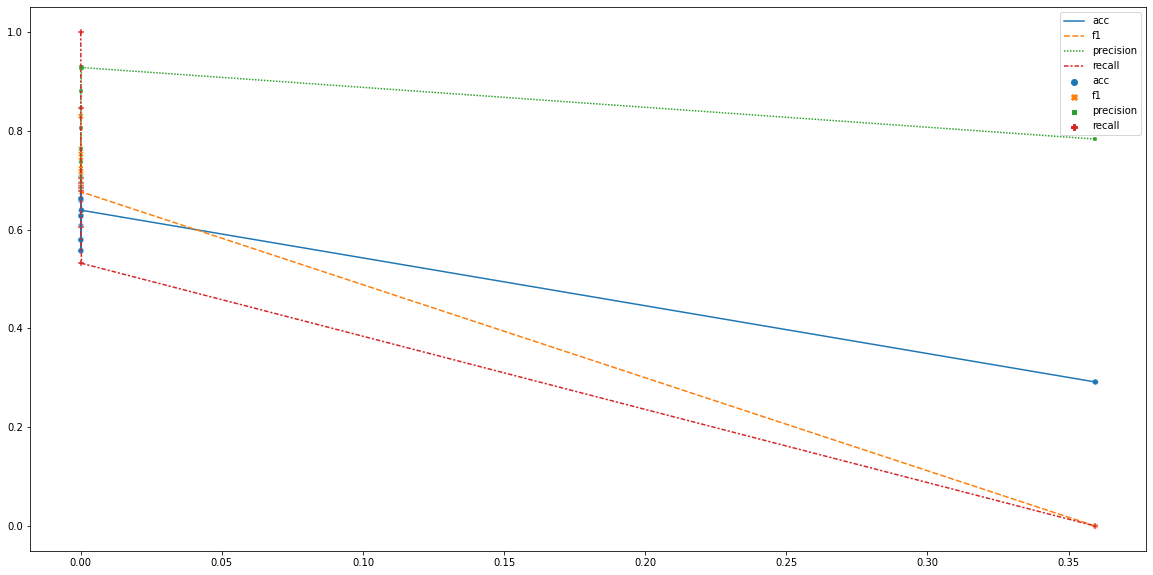

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.lineplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
sns.scatterplot(data=test_result[['acc', 'f1', 'precision', 'recall']])
plt.show()

/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/envs/xgboost_trial2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


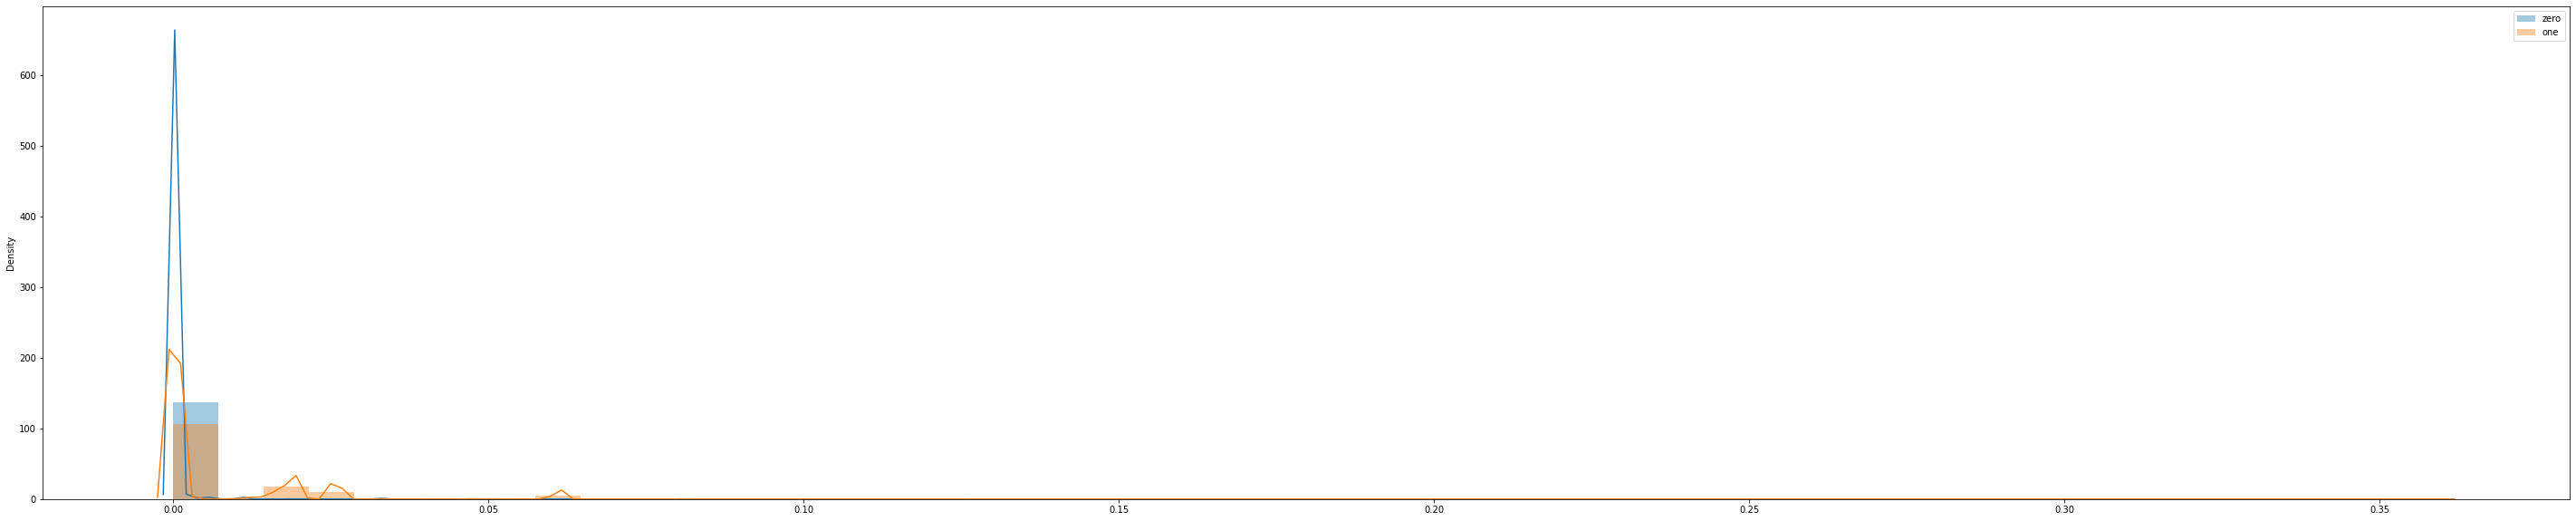

In [82]:
plt.figure(figsize=(50, 10))
sns.distplot(zero, label='zero')
sns.distplot(one, label='one')
plt.legend()
plt.show()

In [83]:
th = 0.000005
def get_loss(x):
  global th 
  if x > th : 
    return 1
  else : 
    return 0
loss_df = pd.Series(total_loss)
loss_df2 = loss_df.apply(get_loss)

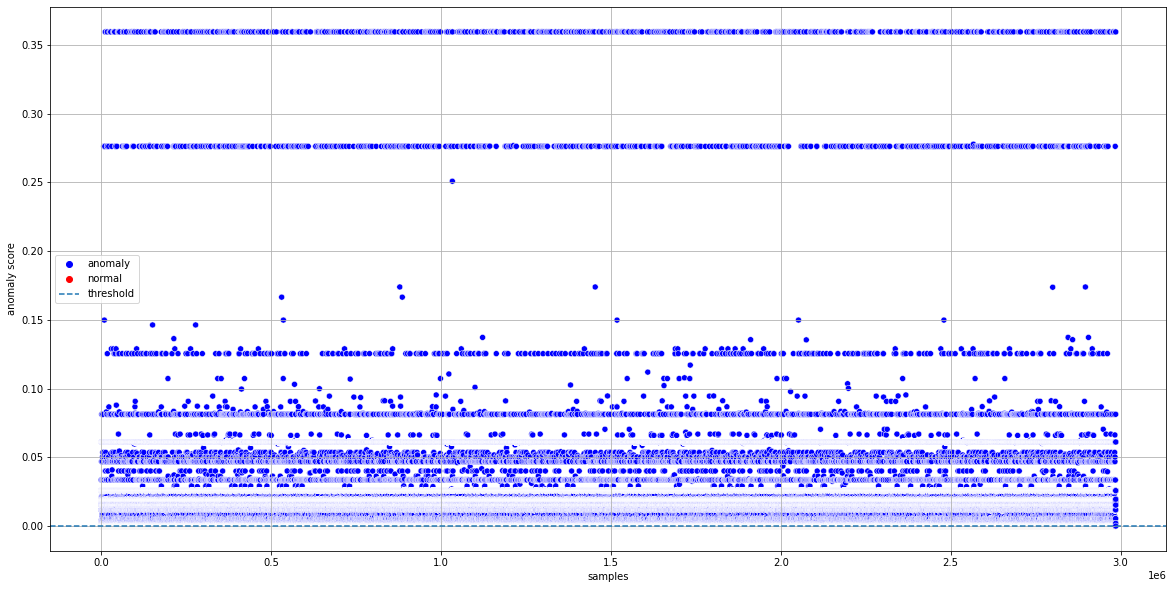

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.scatterplot(x=np.arange(0, len(loss_df)), y= loss_df, hue=['normal' if i==0 else 'anomaly' for i in loss_df2],
                palette=['blue', 'red'], legend='full')
plt.axhline(y = th, linestyle='--', label='threshold')
plt.xlabel('samples')
plt.ylabel('anomaly score')
plt.legend()
plt.grid()
plt.show()

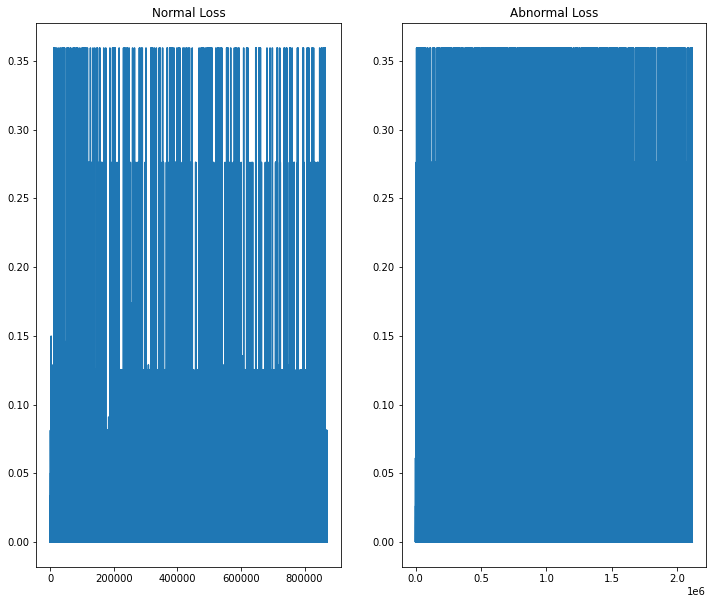

In [85]:
plt.figure(figsize=(12,10))
zero_df = pd.DataFrame(zero)
one_df = pd.DataFrame(one)
plt.subplot(1,2,1)
plt.plot(zero_df)
plt.title('Normal Loss')

plt.subplot(1,2,2)
plt.plot(one_df)
plt.title('Abnormal Loss')

plt.show()